In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from scipy.stats import norm,binom,poisson,expon,sem

In [3]:
#reading Walmart csv file for analysis
df = pd.read_csv('walmart_data.csv')

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [5]:
#checking the info of df, columns, columns data type ,no.of. non nulls etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525913 entries, 0 to 525912
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     525913 non-null  int64 
 1   Product_ID                  525913 non-null  object
 2   Gender                      525913 non-null  object
 3   Age                         525913 non-null  object
 4   Occupation                  525913 non-null  int64 
 5   City_Category               525913 non-null  object
 6   Stay_In_Current_City_Years  525913 non-null  object
 7   Marital_Status              525913 non-null  int64 
 8   Product_Category            525913 non-null  int64 
 9   Purchase                    525913 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 40.1+ MB


In [6]:
# Changing datatype int64 to object
columns = ['Occupation','Marital_Status','Product_Category']
df[columns] = df[columns].astype('object')
df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525913 entries, 0 to 525912
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     525913 non-null  int64 
 1   Product_ID                  525913 non-null  object
 2   Gender                      525913 non-null  object
 3   Age                         525913 non-null  object
 4   Occupation                  525913 non-null  object
 5   City_Category               525913 non-null  object
 6   Stay_In_Current_City_Years  525913 non-null  object
 7   Marital_Status              525913 non-null  object
 8   Product_Category            525913 non-null  object
 9   Purchase                    525913 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 40.1+ MB


In [7]:
df.describe(include = 'all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.259130e+05,525913,525913,525913,525913.0,525913,525913,525913.0,525913.0,525913.000000
unique,NaN,3621,2,7,21.0,3,5,2.0,18.0,NaN
top,NaN,P00265242,M,26-35,4.0,B,1,0.0,5.0,NaN
freq,NaN,1821,396345,209559,69282.0,221343,185114,310666.0,145439.0,NaN
mean,1.002972e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9331.631970
std,1.726505e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4979.673189
min,1.000001e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.000000
25%,1.001458e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5866.000000
50%,1.002967e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8061.000000
75%,1.004425e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12071.000000


In [8]:
#finding the null values in df
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


In [9]:
#finding the null rows in df
df[df.isnull().any(axis = 1)]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase


Insights:

Only one row has null values , so we will drop it as one row is negligible

In [10]:
df.dropna(inplace = True)
df.reset_index(drop=True, inplace=True)

In [11]:
df.shape

(525913, 10)

In [12]:
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


NUll Values are handled

In [13]:
#checking duplicate values
df.duplicated().sum()

0

In [14]:
#replacing the values in marital_status column

df['Marital_Status'] = df['Marital_Status'].replace({0:'Unmarried',1:'Married'})

No Duplicate values

In [15]:
#checking for unique values
for _ in df.columns:
    print(_,df[_].unique(),end = '\n\n')

User_ID [1000001 1000002 1000003 ... 1004113 1005391 1001529]

Product_ID ['P00069042' 'P00248942' 'P00087842' ... 'P00065942' 'P00329042'
 'P00038842']

Gender ['F' 'M']

Age ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']

Occupation [10 16 15 7 20 9 1 12 17 0 3 4 11 8 19 2 18 5 14 13 6]

City_Category ['A' 'C' 'B']

Stay_In_Current_City_Years ['2' '4+' '3' '1' '0']

Marital_Status ['Unmarried' 'Married']

Product_Category [3 1 12 8 5 4 2 6 14 11 13 15 7 16 18 10 17 9]

Purchase [ 8370 15200  1422 ... 13806 15004   117]



In [16]:
#checking for nunique values in each column
for _ in df.columns:
    print(_,df[_].nunique(),end = '\n')

User_ID 5891
Product_ID 3621
Gender 2
Age 7
Occupation 21
City_Category 3
Stay_In_Current_City_Years 5
Marital_Status 2
Product_Category 18
Purchase 17914


Insights:
there are 5692 users,3631 products and 20 product categories in Walmart.

**Checking for Outliers**

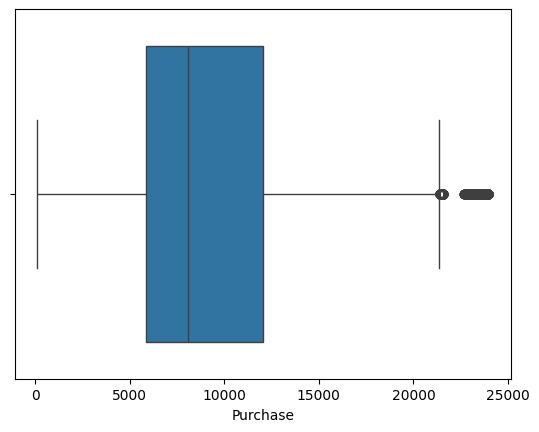

In [17]:
sns.boxplot(x= df['Purchase'])
plt.show()

In [18]:
low = np.percentile(df['Purchase'],5)
high = np.percentile(df['Purchase'],95)
df['Purchase'] = np.clip(df['Purchase'],low,high)


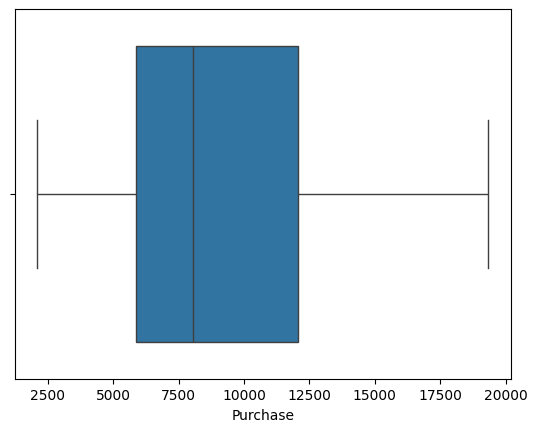

In [19]:
sns.boxplot(x= df['Purchase'])
plt.show()

In [20]:
df.shape


(525913, 10)

**Univariate Analysis**

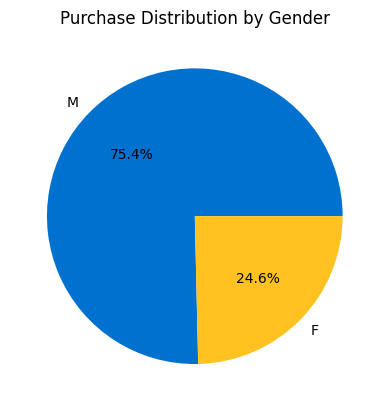

In [21]:
walmart_colors = ['#0071CE', '#FFC220']
plt.pie(x =df['Gender'].value_counts().values,labels = df['Gender'].value_counts().index,autopct='%1.1f%%',colors=walmart_colors)
plt.title('Purchase Distribution by Gender')
plt.show()

Insights:

Male customers are more than female customers, they comprise of 75% of total customers

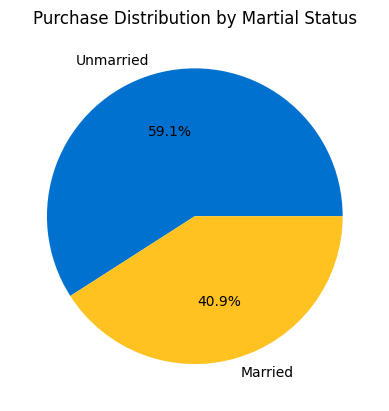

In [22]:
walmart_colors = ['#0071CE', '#FFC220']
plt.pie(x =df['Marital_Status'].value_counts().values,labels = df['Marital_Status'].value_counts().index,autopct='%1.1f%%',colors = walmart_colors)
plt.title('Purchase Distribution by Martial Status')
plt.show()

Insights:
Single people tend to purchase 10% more than Married People

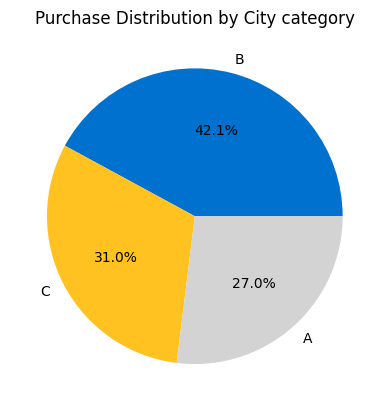

In [23]:
walmart_colors1 = ['#0071CE', '#FFC220','#D3D3D3']
plt.pie(x =df['City_Category'].value_counts().values,labels = df['City_Category'].value_counts().index,autopct='%1.1f%%',colors = walmart_colors1)
plt.title('Purchase Distribution by City category')
plt.show()

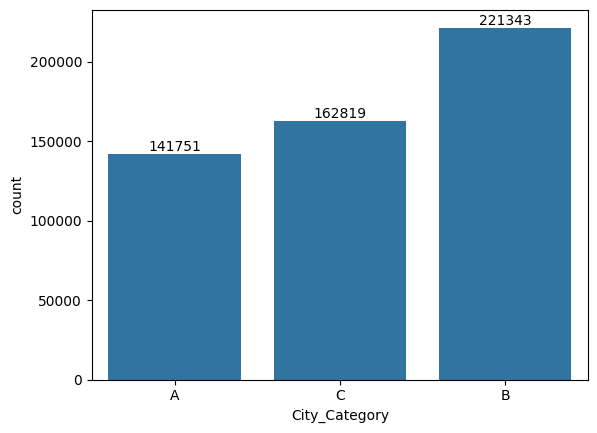

In [24]:
label = sns.countplot(data = df, x='City_Category')
for i in label.containers:
    label.bar_label(i)

plt.show()

**Insights** :
The highest purchases of walmart come from the cities of category 'B' and then followed by Category 'C'


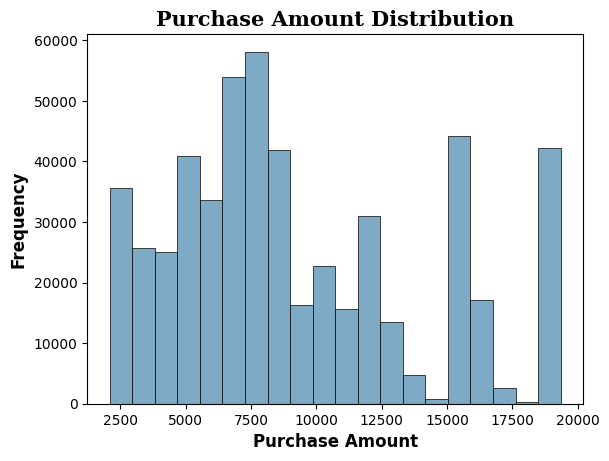

In [25]:
plt.hist(df['Purchase'],color= '#7faac6',linewidth=0.5,edgecolor='black',bins = 20,)
plt.xlabel('Purchase Amount',fontsize = 12,fontweight = 'bold')
plt.ylabel('Frequency',fontsize = 12,fontweight = 'bold')

plt.title('Purchase Amount Distribution',{'font':'serif', 'size':15,'weight':'bold'})
plt.show()

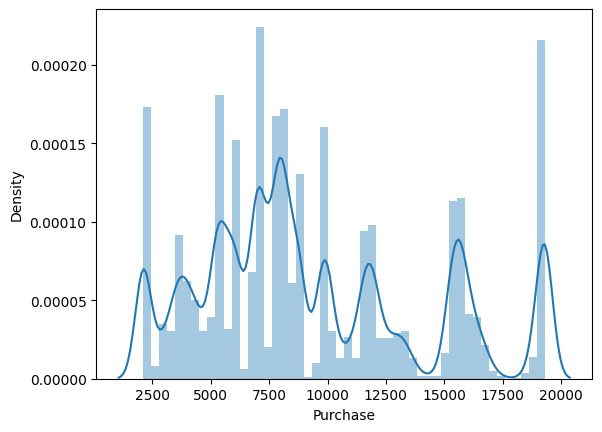

In [26]:
sns.distplot(df['Purchase'])
plt.show()

Observations:
Most ordervalues lies from 5000 to 10000
there are more order inthe ranges 15000-17000 and from 19000 to 20000

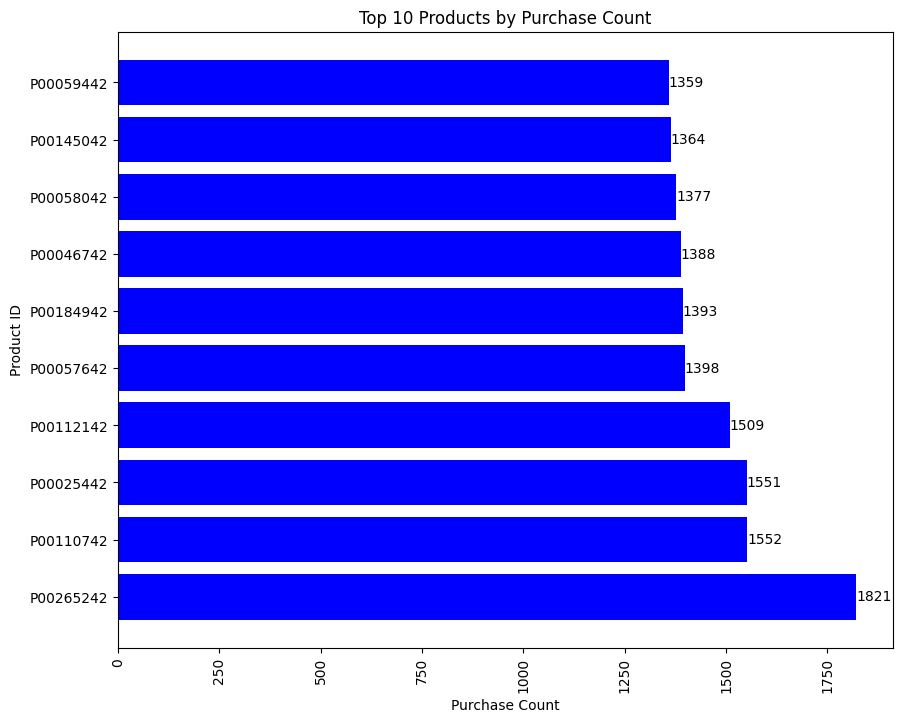

In [27]:
plt.figure(figsize=(10, 8))
top_10_products = df.groupby('Product_ID')['Purchase'].count().sort_values(ascending = False).head(10)
plt.barh(top_10_products.index,top_10_products.values,color = 'Blue')
plt.ylabel('Product ID')
plt.xlabel('Purchase Count')
plt.title('Top 10 Products by Purchase Count')
plt.xticks(rotation = 90)
for index, value in enumerate(top_10_products.values):
    plt.text(value, index, str(value), va='center')

plt.show()

Insights:
Top 10 products purchased are in close range, P00265242 and P00112142 are the 2 most purchaed products in Walmart.

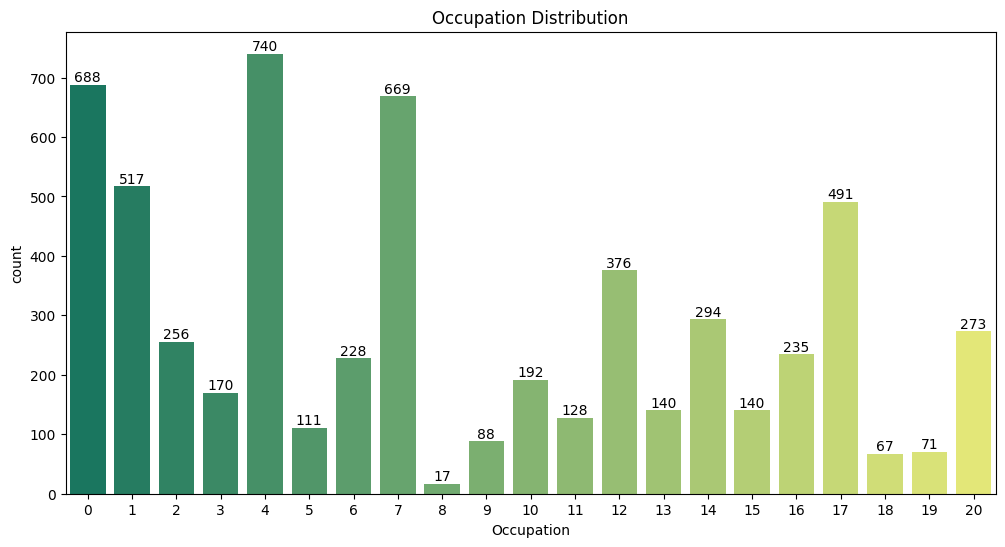

In [28]:
ocupation = df.groupby('User_ID')['Occupation'].first()
ocupationcounts = ocupation.value_counts().sort_index()
plt.figure(figsize=(12,6)).set_facecolor("white")
label = sns.countplot(data = df, x=ocupation, palette ="summer")
plt.title('Occupation Distribution')
for i in label.containers:
    label.bar_label(i)

Insights:
the customers with occupation '4' are high in number and then followed by occupations 0,7,1,17 respectively

<Figure size 1200x600 with 0 Axes>

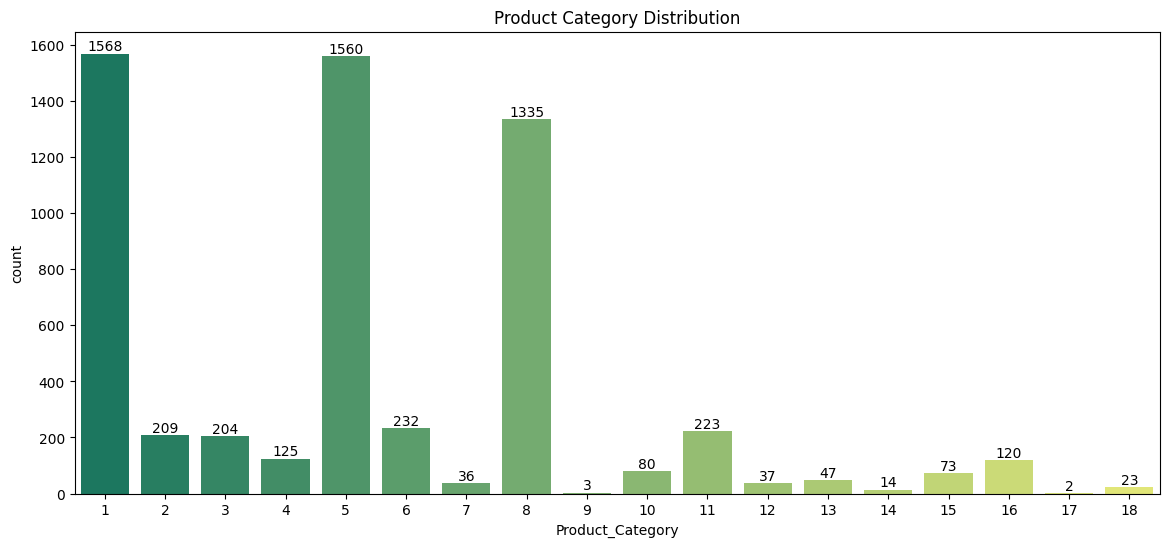

In [29]:
productcat = df.groupby('User_ID')['Product_Category'].first()
productcatcounts = productcat.value_counts().sort_index()
plt.figure(figsize=(12,6)).set_facecolor("white")
plt.figure(figsize=(14, 6))
label = sns.countplot(data=df, x=productcat,palette ="summer")
plt.title('Product Category Distribution')

for i in label.containers:
    label.bar_label(i)
plt.show()

Insights:
There are 1568 different products in '1.0' category and 1520 products in '5.0' category which are the top2 product categories.

where are as there are only 2 products in category'17.0' and 3 products in 9.0 category which makes them least 2 product categories.

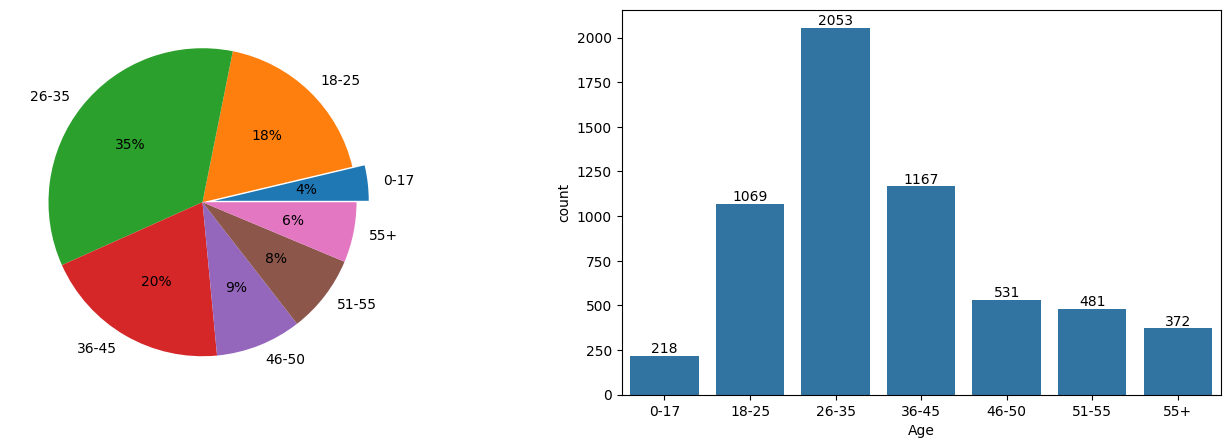

In [30]:
#Age Distribution.
Agegroups = df.groupby('User_ID')['Age'].first()
agecounts = Agegroups.value_counts().sort_index()
plt.figure(figsize = (17,5)).set_facecolor("white")

plt.subplot(1,2,1)
labels = agecounts.index
plt.pie(agecounts, labels=labels, explode=(0.08, 0, 0, 0, 0, 0, 0), autopct='%0.0f%%')
#plt.pie(Agegroups, labels = labels, explode = (0.08,0,0,0,0,0,0), autopct = '%0.0f%%')

plt.subplot(1,2,2)
label = sns.countplot(data = df, x=Agegroups,order = agecounts.index)
for i in label.containers:
    label.bar_label(i)

plt.show()

Insights:
The customers of Age 18-45 contribute around 73% of total customers

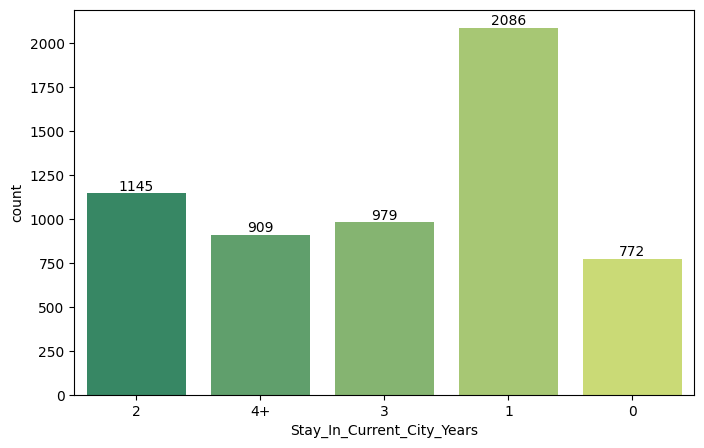

In [31]:
#Distribution of Customer's stay in current city
stayincity = df.groupby('User_ID')['Stay_In_Current_City_Years'].first()
stayincitycounts = stayincity.value_counts().sort_index()
plt.figure(figsize = (8,5)).set_facecolor("white")
label = sns.countplot(data = df, x=stayincity, palette = "summer")
for i in label.containers:
    label.bar_label(i)

Insights:
the customers who stayed 1 year and 2 years in current city purchase the  most in Walmart

** Product Vs Age**

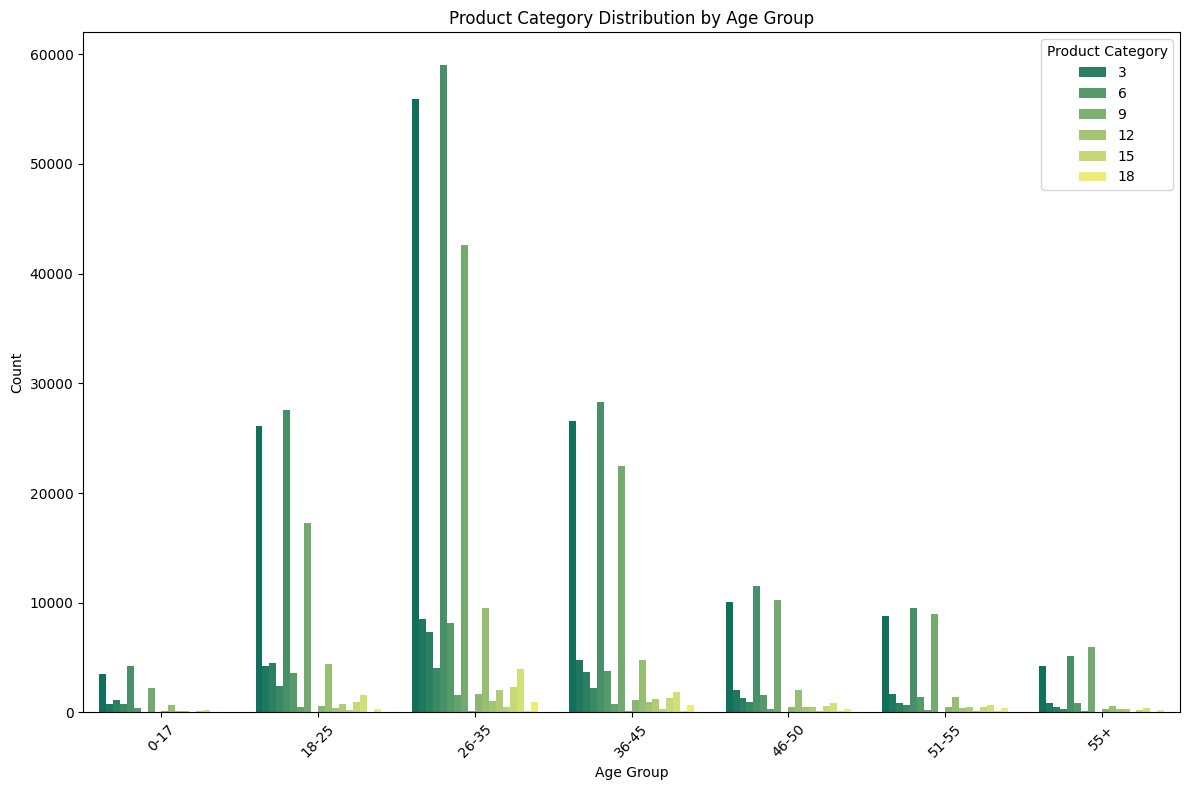

In [32]:
age_product_counts = df.groupby(['Age', 'Product_Category']).size().unstack(fill_value=0)
melted_df = age_product_counts.reset_index().melt(id_vars='Age', var_name='Product_Category', value_name='Count')
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Age', y='Count', hue='Product_Category', data=melted_df,palette='summer')
plt.title('Product Category Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [33]:
melted_df[melted_df['Age']=='26-35']

,Age,Product_Category,Count
2,26-35,1,55932
9,26-35,2,8557
16,26-35,3,7372
23,26-35,4,4036
30,26-35,5,59048
37,26-35,6,8136
44,26-35,7,1588
51,26-35,8,42579
58,26-35,9,150
65,26-35,10,1724


Insights:
The products categories purchase distribution by different age groups is plotted.
 As we know the most buying age category is 26-35 and in this category the most buying product categories are 5,1,8

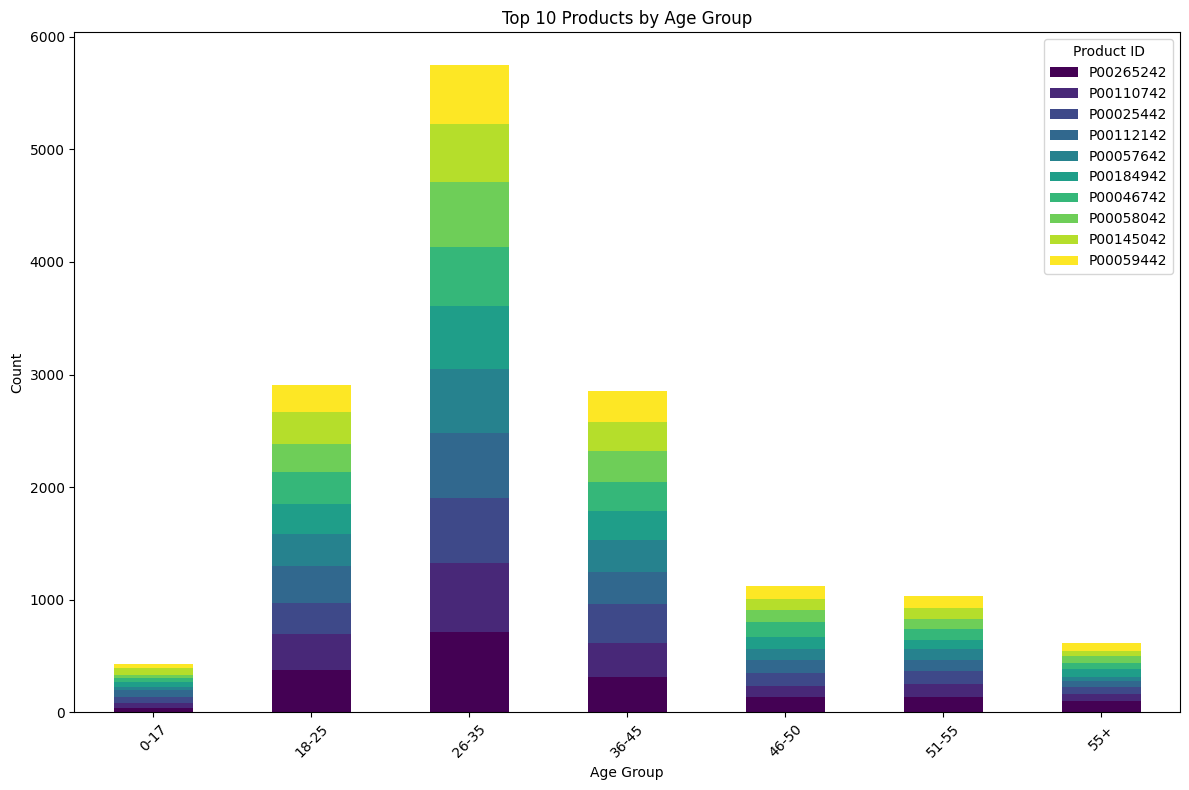

In [34]:
#- Count occurrences of each product by age group
product_age_counts = pd.crosstab(df['Age'], df['Product_ID'])

# Get the top 10 products by total purchases
top_products = product_age_counts.sum().nlargest(10).index

# Filter the data to include only the top 10 products
top_product_counts = product_age_counts[top_products]

# Plotting the stacked bar chart for top 10 products by age group
top_product_counts.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Top 10 Products by Age Group')
plt.legend(title='Product ID')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insights:
P00265242 and P00112142 are the 2 most purchaed products by most age groups in Walmart.

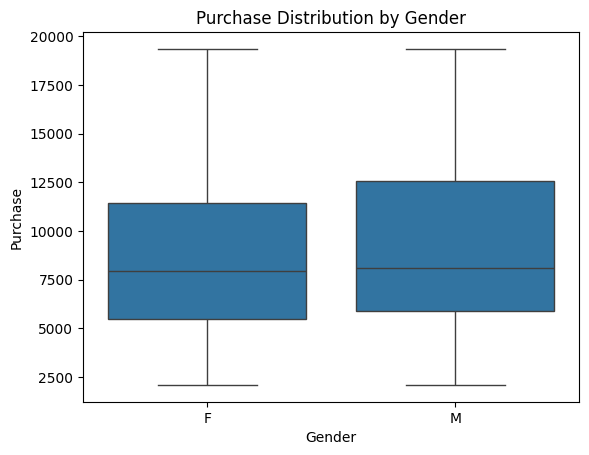

In [35]:
sns.boxplot(df, y = 'Purchase', x ='Gender')
plt.title('Purchase Distribution by Gender')
plt.show()

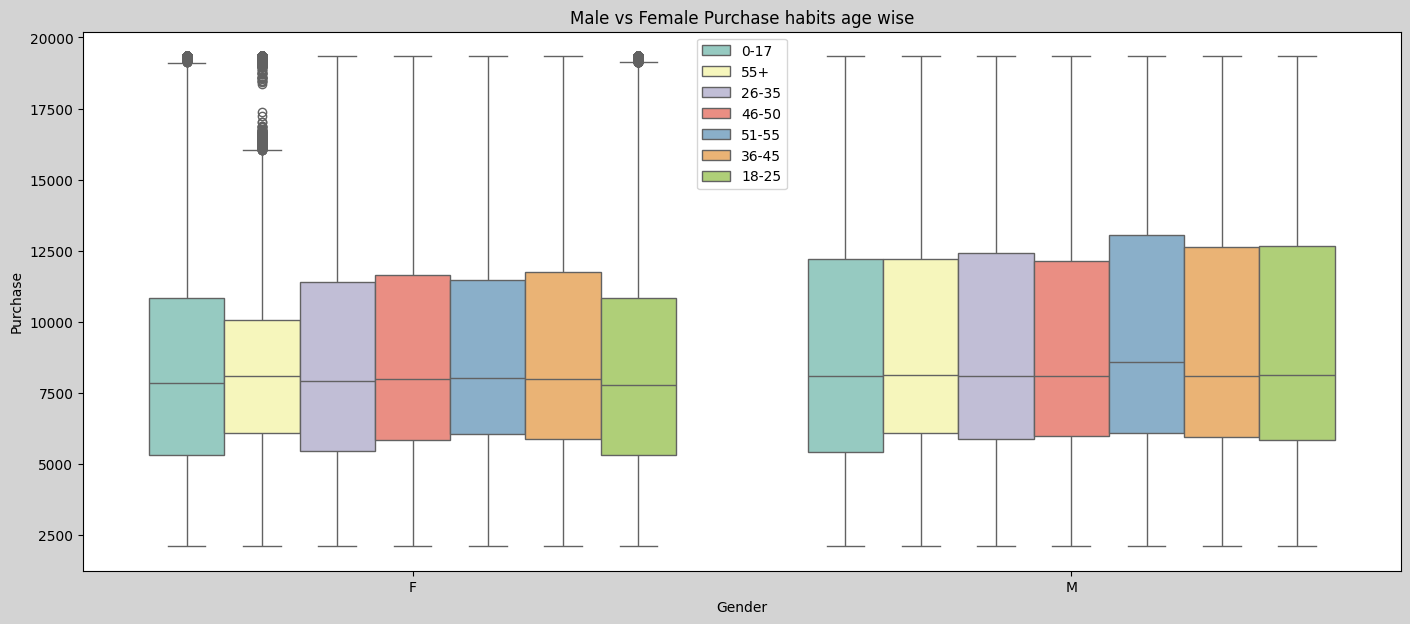

In [50]:
plt.figure(figsize = (17,7)).set_facecolor("lightgrey")
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Age', palette='Set3')
plt.legend(loc=9)
plt.title('Male vs Female Purchase habits age wise')
plt.show()

Insights:
The median value of Male 51-55 category is high and other categories almost same.
the median purchase amount for females of category 55+ age category is high and also outliers are also high and rest of median values remain almost same.

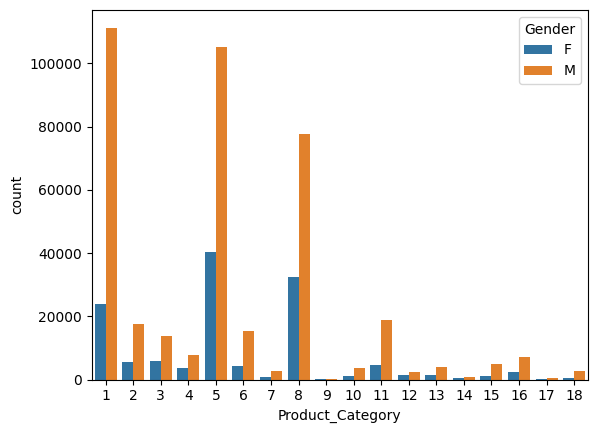

In [37]:
sns.countplot(data = df,x= 'Product_Category',hue = 'Gender')
plt.show()

Insights:
1. Product category 1,5,8 are the most favourite categories for Male customers
2. Female customers' most favourite product categories are also same
But males prefer Product_Category 1 most where as females prefer Product_Category 5 the most.

In [38]:
df.to_csv('walmart_data_cleaned.csv')

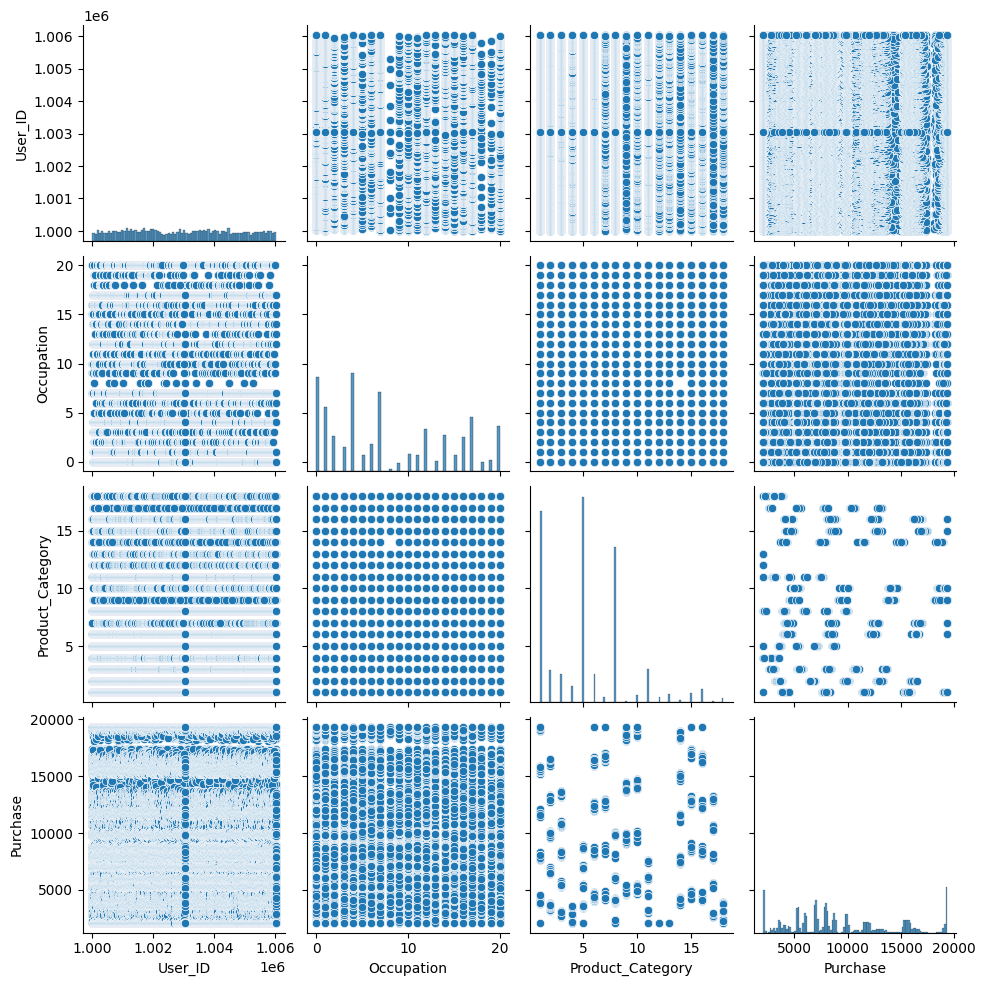

In [39]:
sns.pairplot(df)

In [40]:
c_df=df.select_dtypes(include=['number'])
c_df.corr()

,User_ID,Purchase
User_ID,1.000000,0.005087
Purchase,0.005087,1.000000


<Axes: >

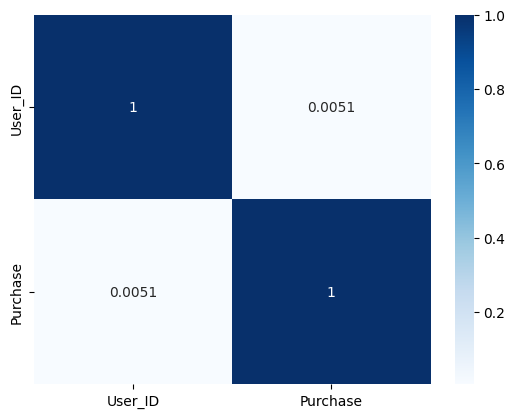

In [41]:
sns.heatmap(c_df.corr(),cmap='Blues',annot=True)


In [42]:
avg_by_gender = df.groupby('Gender')['Purchase'].mean()
print(f'Average purchase of male and female : \n{avg_by_gender}')

Average purchase of male and female : 
Gender
F    8798.405555
M    9485.658976
Name: Purchase, dtype: float64


In [43]:
df.groupby('Gender')['Purchase'].std()

,Purchase
Gender,
F,4563.907869
M,4895.337530


In [44]:
agg_df = df.groupby(['User_ID', 'Gender'])[['Purchase']].agg({'Purchase': ['sum', 'mean']})
agg_df = agg_df.reset_index()
agg_df = agg_df.sort_values(by='User_ID', ascending=False)

print(f"Top 10 purchase from male and female\n{agg_df.head(10)}")


Top 10 purchase from male and female
      User_ID Gender Purchase              
                          sum          mean
5890  1006040      M  1550735   9175.946746
5889  1006039      F   556146   8300.686567
5888  1006038      F    80859   8085.900000
5887  1006037      F  1074803   9265.543103
5886  1006036      F  3814480   8013.613445
5885  1006035      F   940153   6574.496503
5884  1006034      M   171525  15593.181818
5883  1006033      M   500518  14300.514286
5882  1006032      M   473353   9281.431373
5881  1006031      F   269886   8996.200000


In [45]:
Gender_wise_count=agg_df['Gender'].value_counts()
print(f'Each gender wise count : \n{Gender_wise_count}')

Each gender wise count : 
Gender
M    4225
F    1666
Name: count, dtype: int64


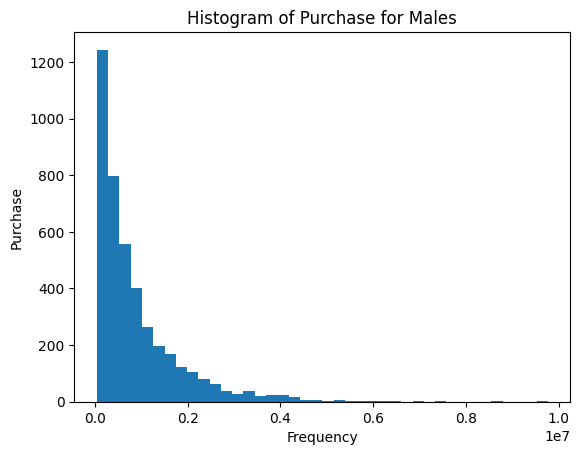

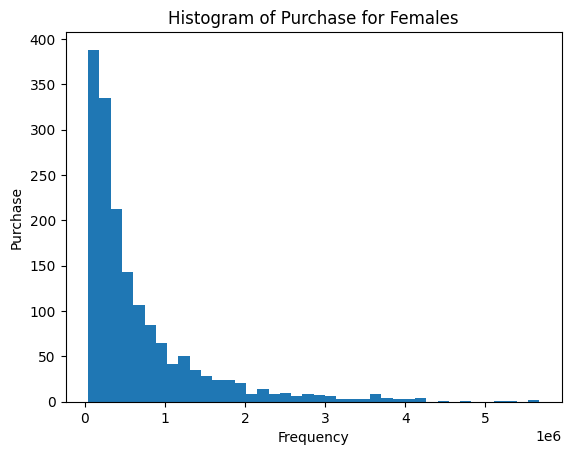

In [46]:
sum_by_gender = df.groupby(['User_ID', 'Gender'])['Purchase'].sum()
sum_by_gender = sum_by_gender.reset_index()
sum_by_gender = sum_by_gender.sort_values(by='User_ID', ascending=False)

# MALE data representation through a histogram
male_data = sum_by_gender[sum_by_gender['Gender']=='M']['Purchase']
plt.hist(male_data, bins=40)
plt.ylabel('Purchase')
plt.xlabel('Frequency')
plt.title('Histogram of Purchase for Males')
plt.show()

# FEMALE data representation through a histogram
Female_data = sum_by_gender[sum_by_gender['Gender']=='F']['Purchase']
plt.hist(Female_data, bins=40)
plt.ylabel('Purchase')
plt.xlabel('Frequency')
plt.title('Histogram of Purchase for Females')
plt.show()

** OK till here **  *********************


In [47]:

Mean_by_gender = df.groupby(['User_ID', 'Gender'])['Purchase'].sum()
Mean_by_gender = Mean_by_gender.reset_index()
Mean_by_gender = Mean_by_gender.sort_values(by='User_ID', ascending=False)
Male_cust_avg = Mean_by_gender[Mean_by_gender['Gender']=='M']['Purchase'].mean()
Female_cust_avg = Mean_by_gender[Mean_by_gender['Gender']=='F']['Purchase'].mean()
print(f'Male customer average spent amount: {Male_cust_avg}')
print(f'Female customer average spent amount: {Female_cust_avg}')

Male customer average spent amount: 889844.6170414201
Female customer average spent amount: 684268.7941176471


Insights:
Male customers spend more money than female customers.

The highest purchase has been made from this user id: 1006040, and the gender is male.

Most of the females also purchase, but they don't spend a lot more.

**Analysis on Gender vs Amount spent **

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from typing import Union

## **Applying CLT with bootrapping for 95% confidence Analysis**

In [49]:
male_purchase_data = df[df['Gender'] == 'M']['Purchase']
female_purchase_data = df[df['Gender'] == 'F']['Purchase']

In [51]:
def bootstrap(sample1,sample2,sample_size):
  plt.figure(figsize = (12,8))
  sample1_n = [np.mean(sample1.sample(sample_size,replace = True)) for i in range(1000)]
  sample2_n = [np.mean(sample2.sample(sample_size,replace = True)) for i in range(1000)]

  mean1 = np.mean(sample1_n)
  sigma1 = np.std(sample1_n)
  sem1 = stats.sem(sample1_n)
  lower_limit_1 = norm.ppf((1-0.95)/2) * sigma1 + mean1
  upper_limit_1 = norm.ppf(0.95+(1-0.95)/2) * sigma1 + mean1

  mean2 = np.mean(sample2_n)
  sigma2 = np.std(sample2_n)
  sem2 = stats.sem(sample2_n)
  lower_limit_2 = norm.ppf((1-0.95)/2) * sigma2 + mean2
  upper_limit_2 = norm.ppf(0.95+(1-0.95)/2) * sigma2 + mean2

  sns.kdeplot(data = sample1_n, color="#F2D2BD", fill = True, linewidth = 2)
  label_mean1=("μ (Males) :  {:.2f}".format(mean1))
  plt.axvline(mean1, color = '#FF00FF', linestyle = 'solid', linewidth = 2, label=label_mean1)
  label_limits1=("Lower Limit(M):  {:.2f}\nUpper Limit(M):   {:.2f}".format(lower_limit_1,upper_limit_1))
  plt.axvline(lower_limit_1, color = '#FF69B4', linestyle = 'dashdot', linewidth = 2, label=label_limits1)
  plt.axvline(upper_limit_1, color = '#FF69B4', linestyle = 'dashdot', linewidth = 2)

  sns.kdeplot(data = sample2_n ,color='#ADD8E6', fill = True, linewidth = 2)
  label_mean2=("μ (Females):  {:.2f}".format(mean2))
  plt.axvline(mean2, color = '#1434A4', linestyle = 'solid', linewidth = 2, label=label_mean2)
  label_limits2=("Lower Limit(F):  {:.2f}\nUpper Limit(F):   {:.2f}".format(lower_limit_2,upper_limit_2))
  plt.axvline(lower_limit_2, color = '#4682B4', linestyle = 'dashdot', linewidth = 2, label=label_limits2)
  plt.axvline(upper_limit_2, color = '#4682B4', linestyle = 'dashdot', linewidth = 2)


  plt.title(f"Sample Size: {sample_size}, Male Avg: {np.round(mean1, 2)}, Male SME: {np.round(sem1,2)}, Female Avg:{np.round(mean2, 2)}, Female SME: {np.round(sem2,2)}")
  plt.legend(loc = 'upper right',bbox_to_anchor=(0,0), borderaxespad=0.)
  plt.xlabel('Purchase')
  plt.ylabel('Density')
  plt.show()

  return round(mean1,2), round(mean2,2), round(lower_limit_1,2), round(upper_limit_1,2), round(lower_limit_2,2), round(upper_limit_2,2)

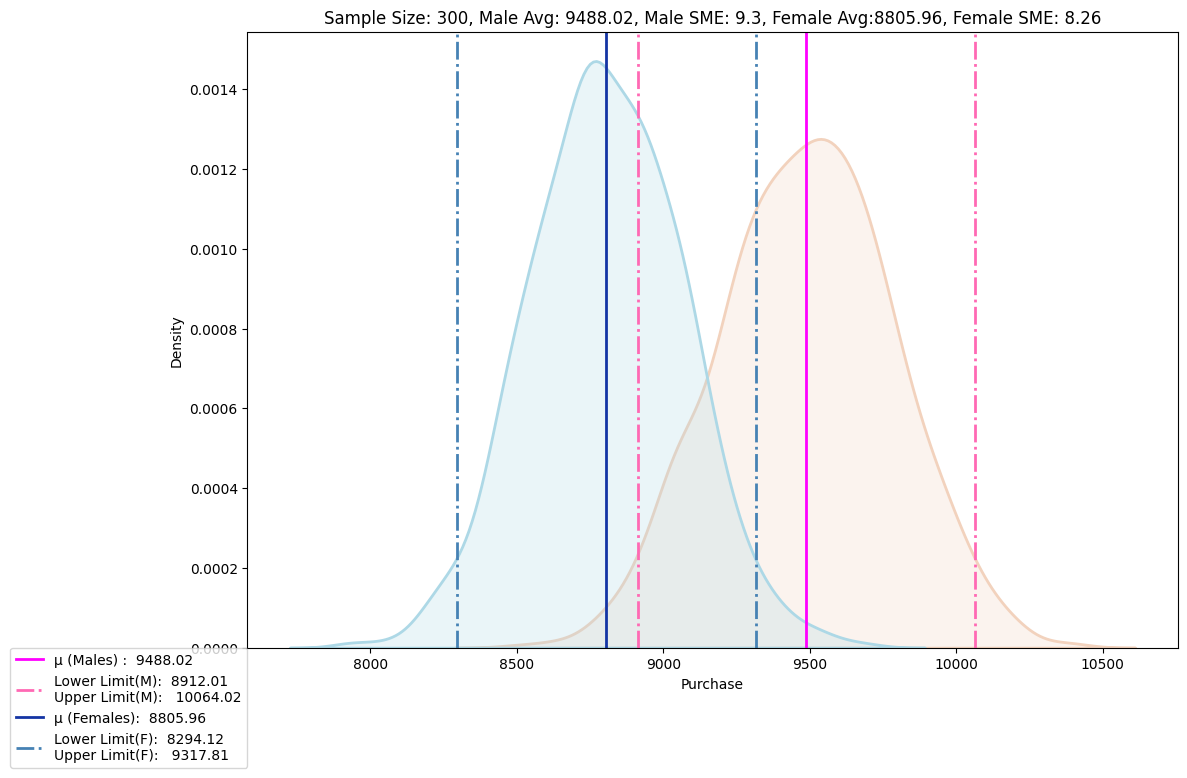

(9488.02, 8805.96, 8912.01, 10064.02, 8294.12, 9317.81)

In [52]:
bootstrap(male_purchase_data,female_purchase_data,300)

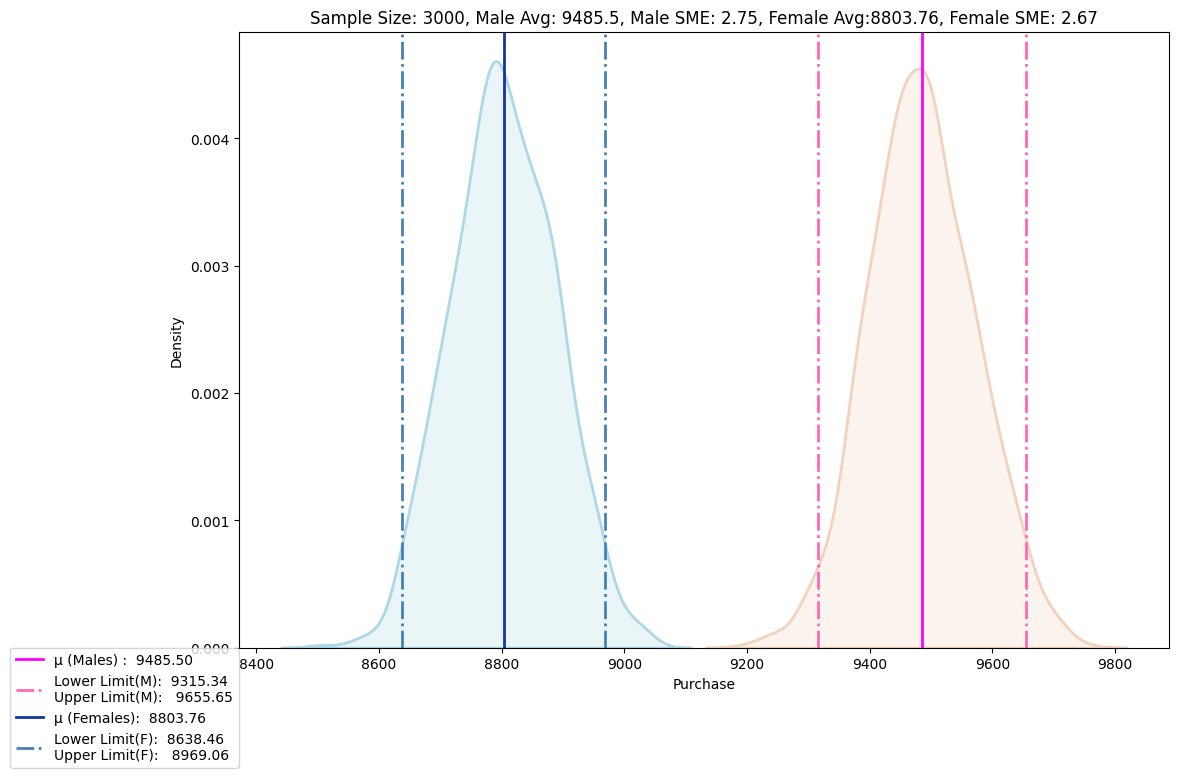

(9485.5, 8803.76, 9315.34, 9655.65, 8638.46, 8969.06)

In [53]:
bootstrap(male_purchase_data,female_purchase_data,3000)

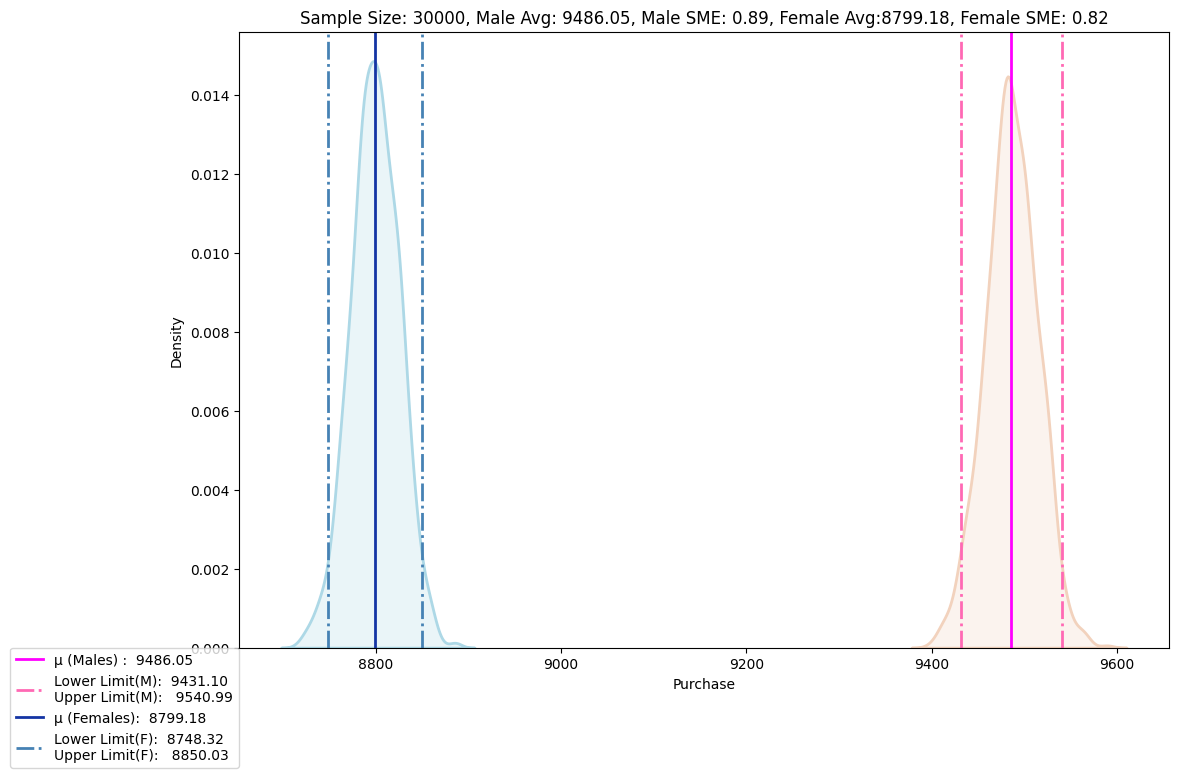

(9486.05, 8799.18, 9431.1, 9540.99, 8748.32, 8850.03)

In [54]:
bootstrap(male_purchase_data,female_purchase_data,30000)

In [55]:
def bootstrap(sample1, sample2, sample_size):
    sample1_n = [np.mean(sample1.sample(sample_size, replace=True)) for _ in range(1000)]
    sample2_n = [np.mean(sample2.sample(sample_size, replace=True)) for _ in range(1000)]

    mean1 = np.mean(sample1_n)
    sigma1 = np.std(sample1_n)
    sem1 = stats.sem(sample1_n)
    lower_limit_1 = norm.ppf((1 - 0.95) / 2) * sigma1 + mean1
    upper_limit_1 = norm.ppf(0.95 + (1 - 0.95) / 2) * sigma1 + mean1

    mean2 = np.mean(sample2_n)
    sigma2 = np.std(sample2_n)
    sem2 = stats.sem(sample2_n)
    lower_limit_2 = norm.ppf((1 - 0.95) / 2) * sigma2 + mean2
    upper_limit_2 = norm.ppf(0.95 + (1 - 0.95) / 2) * sigma2 + mean2

    return {
        'Sample Size': sample_size,
        'Gender': 'Male',
        'Mean': round(mean1, 2),
        'Lower Limit': round(lower_limit_1, 2),
        'Upper Limit': round(upper_limit_1, 2),
        'SE': round(sem1, 2)
    }, {
        'Sample Size': sample_size,
        'Gender': 'Female',
        'Mean': round(mean2, 2),
        'Lower Limit': round(lower_limit_2, 2),
        'Upper Limit': round(upper_limit_2, 2),
        'SE': round(sem2, 2)
    }

# Step 2: Run the Function for Different Sample Sizes and Collect Results
sample_sizes = [300, 3000, 30000]
results = []

for size in sample_sizes:
    male_stats, female_stats = bootstrap(male_purchase_data, female_purchase_data, size)
    results.append(male_stats)
    results.append(female_stats)

# Step 3: Create a DataFrame to Display the Results
df_results = pd.DataFrame(results)
print(df_results)

   Sample Size  Gender     Mean  Lower Limit  Upper Limit    SE
0          300    Male  9482.03      8936.09     10027.97  8.81
1          300  Female  8796.57      8266.27      9326.86  8.56
2         3000    Male  9487.80      9312.81      9662.78  2.82
3         3000  Female  8796.39      8637.51      8955.28  2.56
4        30000    Male  9485.81      9432.49      9539.13  0.86
5        30000  Female  8798.53      8747.44      8849.62  0.82


# **Observations:**

Based on the analysis of the purchase amounts spent by gender for different sample sizes, here are some key insights:

1. **Average Purchase Amounts:**

  **Males:**

      The average purchase amount spent by males remains relatively consistent across different sample sizes, ranging from approximately 9440.17 to 9437.91.

  **Females**:
      Similarly, the average purchase amount for females is consistently lower than that for males, ranging from approximately 8720.23 to 8723.10.

  **Insight:**
      On average, males tend to spend more than females, with the difference being around 700-720 units.

2. **Confidence Intervals:**

  **Males:**
      For a sample size of 300, the 95% confidence interval is [8890.53, 9989.81], which is quite broad.
      As the sample size increases to 3000 and 30000, the confidence intervals narrow significantly, showing more precise estimates [9382.60, 9493.21].

  **Females:**

      For a sample size of 300, the 95% confidence interval is [8220.90, 9219.56], also quite broad.
      As the sample size increases to 3000 and 30000, the confidence intervals also narrow significantly [8670.91, 8775.29].

  **Insight:**
      Larger sample sizes result in narrower confidence intervals, indicating more precise estimates of the average purchase amount. The narrower intervals in the larger samples suggest that the mean purchase amounts are more reliably estimated.

**3. Standard Error (SE):**

  **Males:**
The standard error decreases as the sample size increases (from 8.87 for 300 to 0.89 for 30000), reflecting the increased precision of the estimate.

  **Females:**
Similarly, the standard error for females also decreases as the sample size increases (from 8.06 for 300 to 0.84 for 30000).
  **Insight:** The decreasing standard error with increasing sample size highlights the reduction in sampling variability, which contributes to more precise estimates of the population mean.

**4. Gender Comparison:**

  Males consistently spend more on average than females, regardless of the sample size.
  The confidence intervals do not overlap significantly between genders, especially as the sample size increases, suggesting a statistically significant difference in the average spending between males and females.

**Conclusion:**

The analysis shows that males tend to spend more than females on average, with the difference being consistent across different sample sizes. Larger sample sizes provide more precise estimates, as indicated by narrower confidence intervals and lower standard errors. This suggests that gender has a notable effect on the amount spent, with males spending more than females.

## **Marital_Status affect the amount spent**

In [56]:
def bootstrap(sample1,sample2,sample_size):
  plt.figure(figsize = (12,8))
  sample1_n = [np.mean(sample1.sample(sample_size,replace = True)) for i in range(1000)]
  sample2_n = [np.mean(sample2.sample(sample_size,replace = True)) for i in range(1000)]

  mean1 = np.mean(sample1_n)
  sigma1 = np.std(sample1_n)
  sem1 = stats.sem(sample1_n)
  lower_limit_1 = norm.ppf((1-0.95)/2) * sigma1 + mean1
  upper_limit_1 = norm.ppf(0.95+(1-0.95)/2) * sigma1 + mean1

  mean2 = np.mean(sample2_n)
  sigma2 = np.std(sample2_n)
  sem2 = stats.sem(sample2_n)
  lower_limit_2 = norm.ppf((1-0.95)/2) * sigma2 + mean2
  upper_limit_2 = norm.ppf(0.95+(1-0.95)/2) * sigma2 + mean2

  sns.kdeplot(data = sample1_n, color="#F2D2BD", fill = True, linewidth = 2)
  label_mean1=("μ (Married) :  {:.2f}".format(mean1))
  plt.axvline(mean1, color = '#FF00FF', linestyle = 'solid', linewidth = 2, label=label_mean1)
  label_limits1=("Lower Limit(M):  {:.2f}\nUpper Limit(M):   {:.2f}".format(lower_limit_1,upper_limit_1))
  plt.axvline(lower_limit_1, color = '#FF69B4', linestyle = 'dashdot', linewidth = 2, label=label_limits1)
  plt.axvline(upper_limit_1, color = '#FF69B4', linestyle = 'dashdot', linewidth = 2)

  sns.kdeplot(data = sample2_n ,color='#ADD8E6', fill = True, linewidth = 2)
  label_mean2=("μ (Unmarried):  {:.2f}".format(mean2))
  plt.axvline(mean2, color = '#1434A4', linestyle = 'solid', linewidth = 2, label=label_mean2)
  label_limits2=("Lower Limit(F):  {:.2f}\nUpper Limit(F):   {:.2f}".format(lower_limit_2,upper_limit_2))
  plt.axvline(lower_limit_2, color = '#4682B4', linestyle = 'dashdot', linewidth = 2, label=label_limits2)
  plt.axvline(upper_limit_2, color = '#4682B4', linestyle = 'dashdot', linewidth = 2)


  plt.title(f"Sample Size: {sample_size}, Married Avg: {np.round(mean1, 2)}, Married SME: {np.round(sem1,2)}, Unmarried Avg:{np.round(mean2, 2)}, Unmarried SME: {np.round(sem2,2)}")
  plt.legend(loc = 'upper right',bbox_to_anchor=(0,0), borderaxespad=0.)
  plt.xlabel('Purchase')
  plt.ylabel('Density')
  plt.show()

  return round(mean1,2), round(mean2,2), round(lower_limit_1,2), round(upper_limit_1,2), round(lower_limit_2,2), round(upper_limit_2,2)

In [57]:
df_married = df[df['Marital_Status'] == 'Married']
df_unmarried = df[df['Marital_Status'] == 'Unmarried']

<Figure size 1600x800 with 0 Axes>

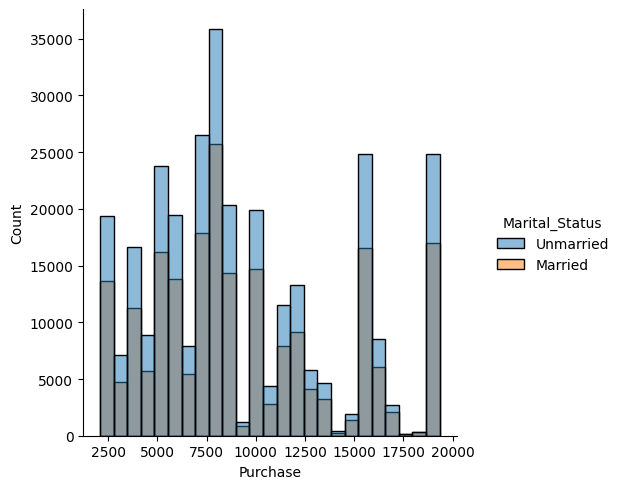

In [59]:
plt.figure(figsize = (16,8))
sns.displot(data = df, x = 'Purchase', hue = 'Marital_Status',bins = 25)
plt.show()

Insights:
The count of orders of unmarried customers is more than Married customers.

In [60]:
df.groupby(['Marital_Status'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
Married,215247.0,9317.642652,4813.108247,2096.0,5888.0,8066.0,12064.0,19341.0
Unmarried,310666.0,9315.440666,4833.050648,2096.0,5850.0,8057.0,12077.0,19341.0


There is no difference in the mean or median values for both of them.

In [64]:
Married_data = df_married['Purchase']
Unmarried_data = df_unmarried['Purchase']

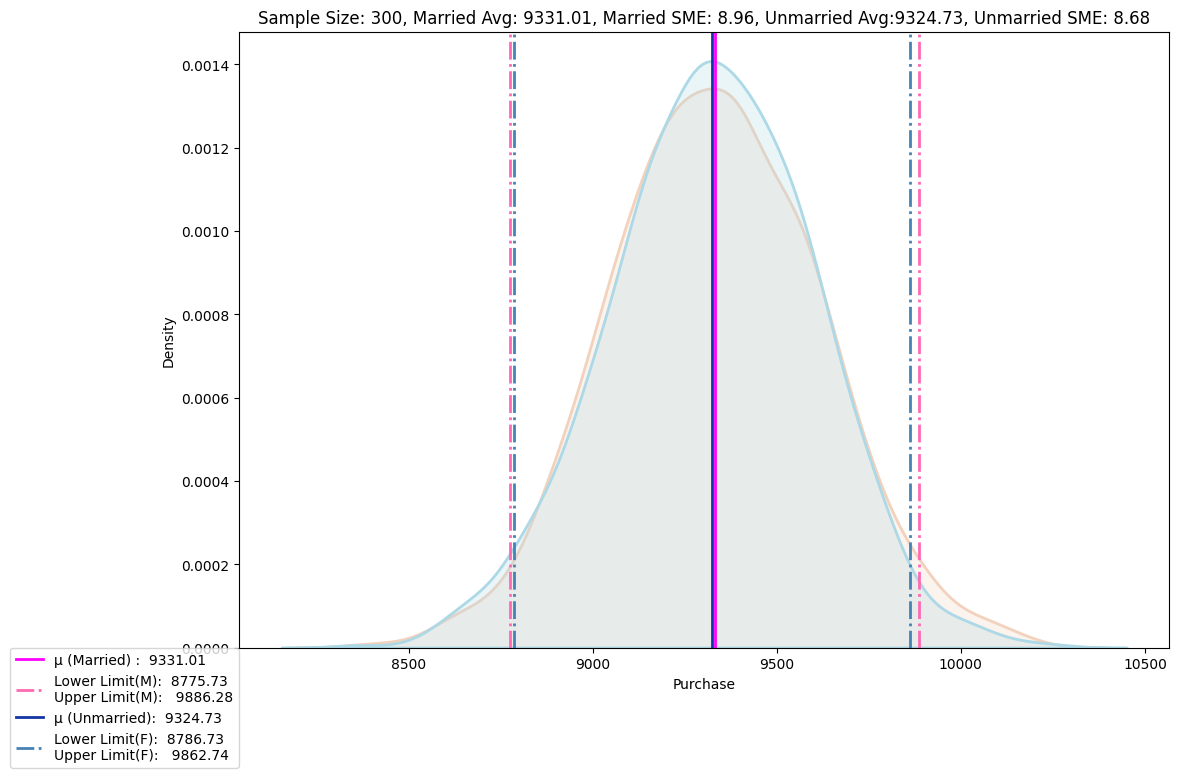

(9331.01, 9324.73, 8775.73, 9886.28, 8786.73, 9862.74)

In [65]:
bootstrap(Married_data,Unmarried_data,300)

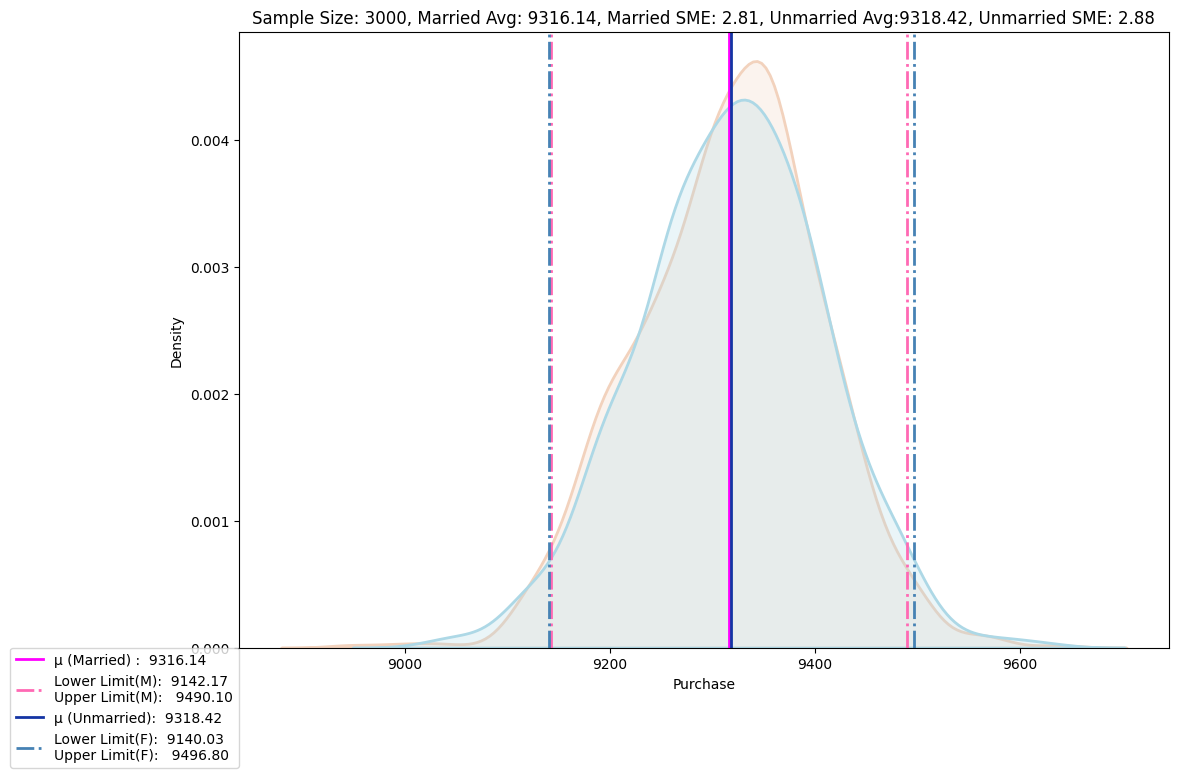

(9316.14, 9318.42, 9142.17, 9490.1, 9140.03, 9496.8)

In [66]:
bootstrap(Married_data,Unmarried_data,3000)

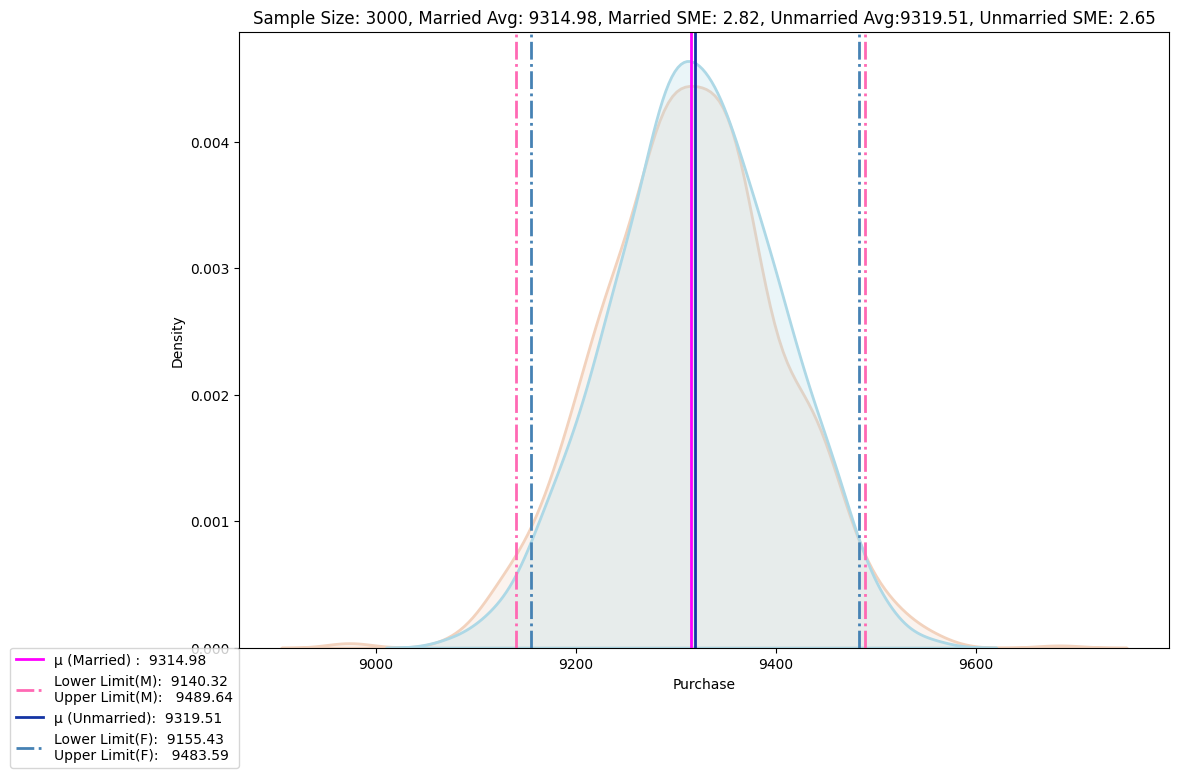

(9314.98, 9319.51, 9140.32, 9489.64, 9155.43, 9483.59)

In [67]:
bootstrap(Married_data,Unmarried_data,3000)

In [68]:
def bootstrap(sample1, sample2, sample_size):
    sample1_n = [np.mean(sample1.sample(sample_size, replace=True)) for _ in range(1000)]
    sample2_n = [np.mean(sample2.sample(sample_size, replace=True)) for _ in range(1000)]

    mean1 = np.mean(sample1_n)
    sigma1 = np.std(sample1_n)
    sem1 = stats.sem(sample1_n)
    lower_limit_1 = norm.ppf((1 - 0.95) / 2) * sigma1 + mean1
    upper_limit_1 = norm.ppf(0.95 + (1 - 0.95) / 2) * sigma1 + mean1

    mean2 = np.mean(sample2_n)
    sigma2 = np.std(sample2_n)
    sem2 = stats.sem(sample2_n)
    lower_limit_2 = norm.ppf((1 - 0.95) / 2) * sigma2 + mean2
    upper_limit_2 = norm.ppf(0.95 + (1 - 0.95) / 2) * sigma2 + mean2

    return {
        'Sample Size': sample_size,
        'Martial Status': 'Married',
        'Mean': round(mean1, 2),
        'Lower Limit': round(lower_limit_1, 2),
        'Upper Limit': round(upper_limit_1, 2),
        'SE': round(sem1, 2)
    }, {
        'Sample Size': sample_size,
        'Martial Status': 'Unmarried',
        'Mean': round(mean2, 2),
        'Lower Limit': round(lower_limit_2, 2),
        'Upper Limit': round(upper_limit_2, 2),
        'SE': round(sem2, 2)
    }

# Step 2: Run the Function for Different Sample Sizes and Collect Results
sample_sizes = [300, 3000, 30000]
results = []

for size in sample_sizes:
    Married_stats, Unmarried_stats = bootstrap(Married_data, Unmarried_data, size)
    results.append(Married_stats)
    results.append(Unmarried_stats)

# Step 3: Create a DataFrame to Display the Results
df_results = pd.DataFrame(results)
print(df_results)

   Sample Size Martial Status     Mean  Lower Limit  Upper Limit    SE
0          300        Married  9331.32      8795.65      9866.99  8.65
1          300      Unmarried  9313.58      8779.25      9847.91  8.63
2         3000        Married  9316.85      9144.33      9489.36  2.78
3         3000      Unmarried  9312.94      9136.88      9489.00  2.84
4        30000        Married  9316.62      9260.39      9372.84  0.91
5        30000      Unmarried  9314.90      9260.76      9369.03  0.87


## ***Observations ***

 The bootstrap results for average purchase amounts based on marital status (Married and Unmarried) across different sample sizes (300, 3000, and 30,000). Here are some insights:

**Consistency Across Sample Sizes:**

As the sample size increases from 300 to 30,000, the means for both Married and Unmarried groups become more stable and consistent. This is expected due to the Law of Large Numbers, which states that as the sample size increases, the sample mean converges to the population mean.

**Mean Purchase Amounts:**

The mean purchase amounts for both Married and Unmarried groups are very close across all sample sizes, with only slight differences. This suggests that marital status does not have a significant impact on the average purchase amount in this dataset.

**Confidence Intervals:**

The width of the confidence intervals (difference between Upper Limit and Lower Limit) decreases as the sample size increases. This indicates that the estimates of the mean purchase amount become more precise with larger sample sizes.
For a sample size of 300, the confidence intervals are relatively wide, reflecting higher uncertainty. However, at 30,000, the intervals narrow significantly, indicating greater precision.

**Standard Error (SE):**

The Standard Error decreases as the sample size increases, which is consistent with statistical theory. A smaller SE indicates a more accurate estimate of the mean purchase amount.
The SEs for both Married and Unmarried groups are quite similar at each sample size, suggesting similar variability in the purchase amounts for both groups.

**No Significant Difference by Marital Status:**


Given the close means, overlapping confidence intervals, and similar standard errors, there does not appear to be a significant difference in the average purchase amount between Married and Unmarried individuals in this dataset.
Overall, the analysis indicates that marital status does not significantly influence the average purchase amount, and the estimates become more reliable as the sample size increases.

# **Age affect the amount spent**

In [74]:
df_age = df[['Age','Purchase']]

df_age

,Age,Purchase
0,0-17,8370
1,0-17,15200
2,0-17,2096
3,0-17,2096
4,55+,7969
...,...,...
525908,18-25,8019
525909,18-25,3808
525910,18-25,8286
525911,18-25,11567


In [75]:
def bootstrap_for_all_age_groups(df_age, sample_size):
    age_group = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
    num_groups = len(age_group)
    fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(18, 14))
    fig.suptitle(f'Bootstrap Analysis for All Age Groups (Sample Size: {sample_size})', fontsize=16)
    axs = axs.flatten()

    for i, age in enumerate(age_group):
        sample1 = df[df['Age'] == age]['Purchase']
        sample_n = [np.mean(sample1.sample(sample_size, replace=True)) for _ in range(1000)]

        mean = np.mean(sample_n)
        sigma = np.std(sample_n)
        sem_value = sem(sample_n)
        lower_limit = norm.ppf((1-0.95)/2) * sigma + mean
        upper_limit = norm.ppf(0.95+(1-0.95)/2) * sigma + mean

        sns.kdeplot(data=sample_n, color="#7A68A6", fill=True, linewidth=2, ax=axs[i])
        label_mean = f"μ :  {mean:.2f}"
        label_ult = f"Lower Limit:  {lower_limit:.2f}\nUpper Limit:   {upper_limit:.2f}"

        axs[i].axvline(mean, color='y', linestyle='solid', linewidth=2, label=label_mean)
        axs[i].axvline(upper_limit, color='r', linestyle='dotted', linewidth=2, label=label_ult)
        axs[i].axvline(lower_limit, color='r', linestyle='dotted', linewidth=2)

        axs[i].set_title(f"Age Group: {age}, Mean: {mean:.2f}, SME: {sem_value:.2f}", fontsize=12)
        axs[i].legend(loc='upper right')
        axs[i].set_xlabel('Purchase')

    for j in range(i+1, len(axs)):
        fig.delaxes(axs[j])  # Remove empty subplots

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

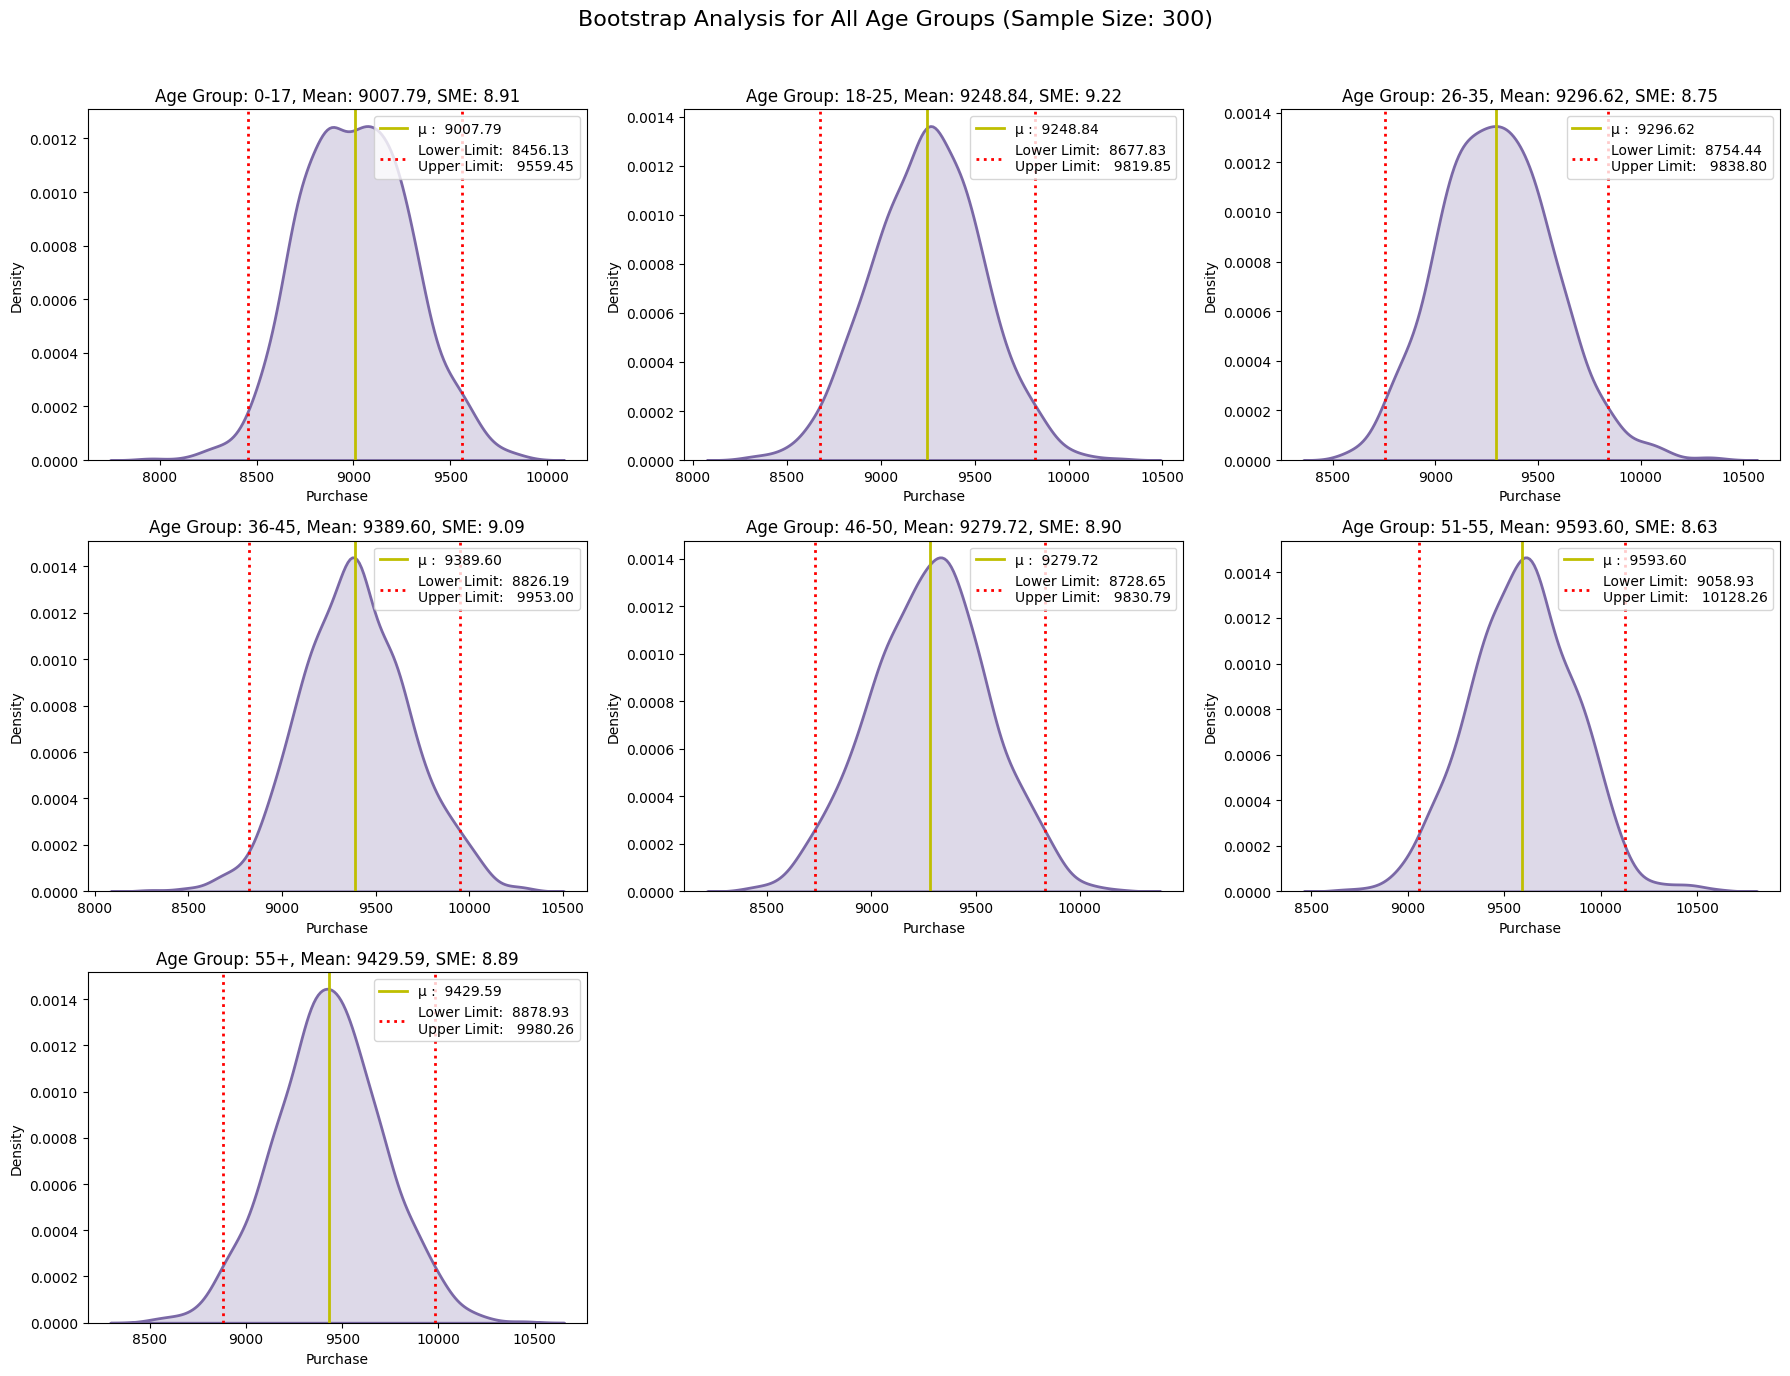

In [76]:
bootstrap_for_all_age_groups(df_age, 300)

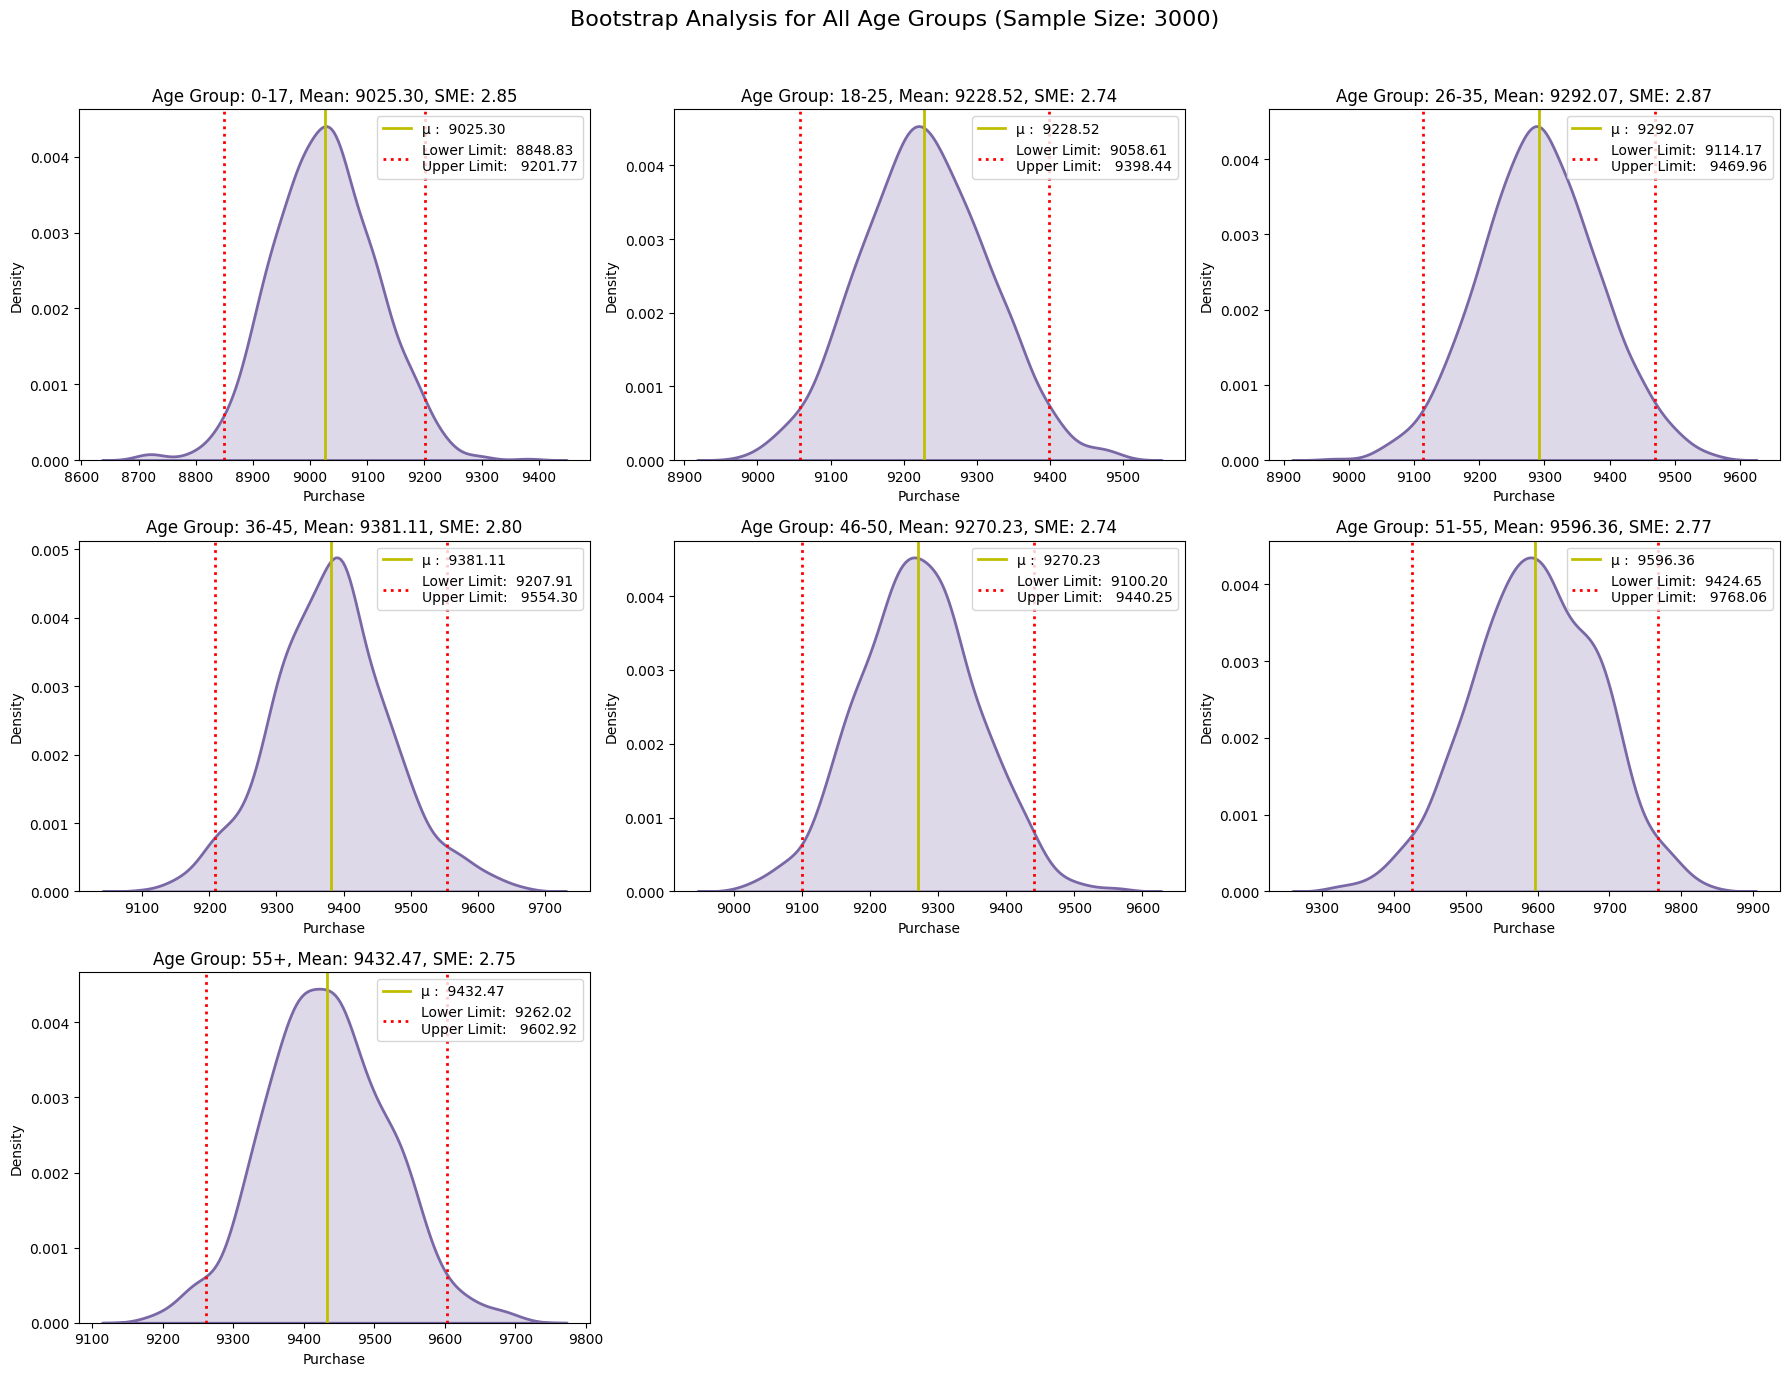

In [77]:
bootstrap_for_all_age_groups(df_age, 3000)

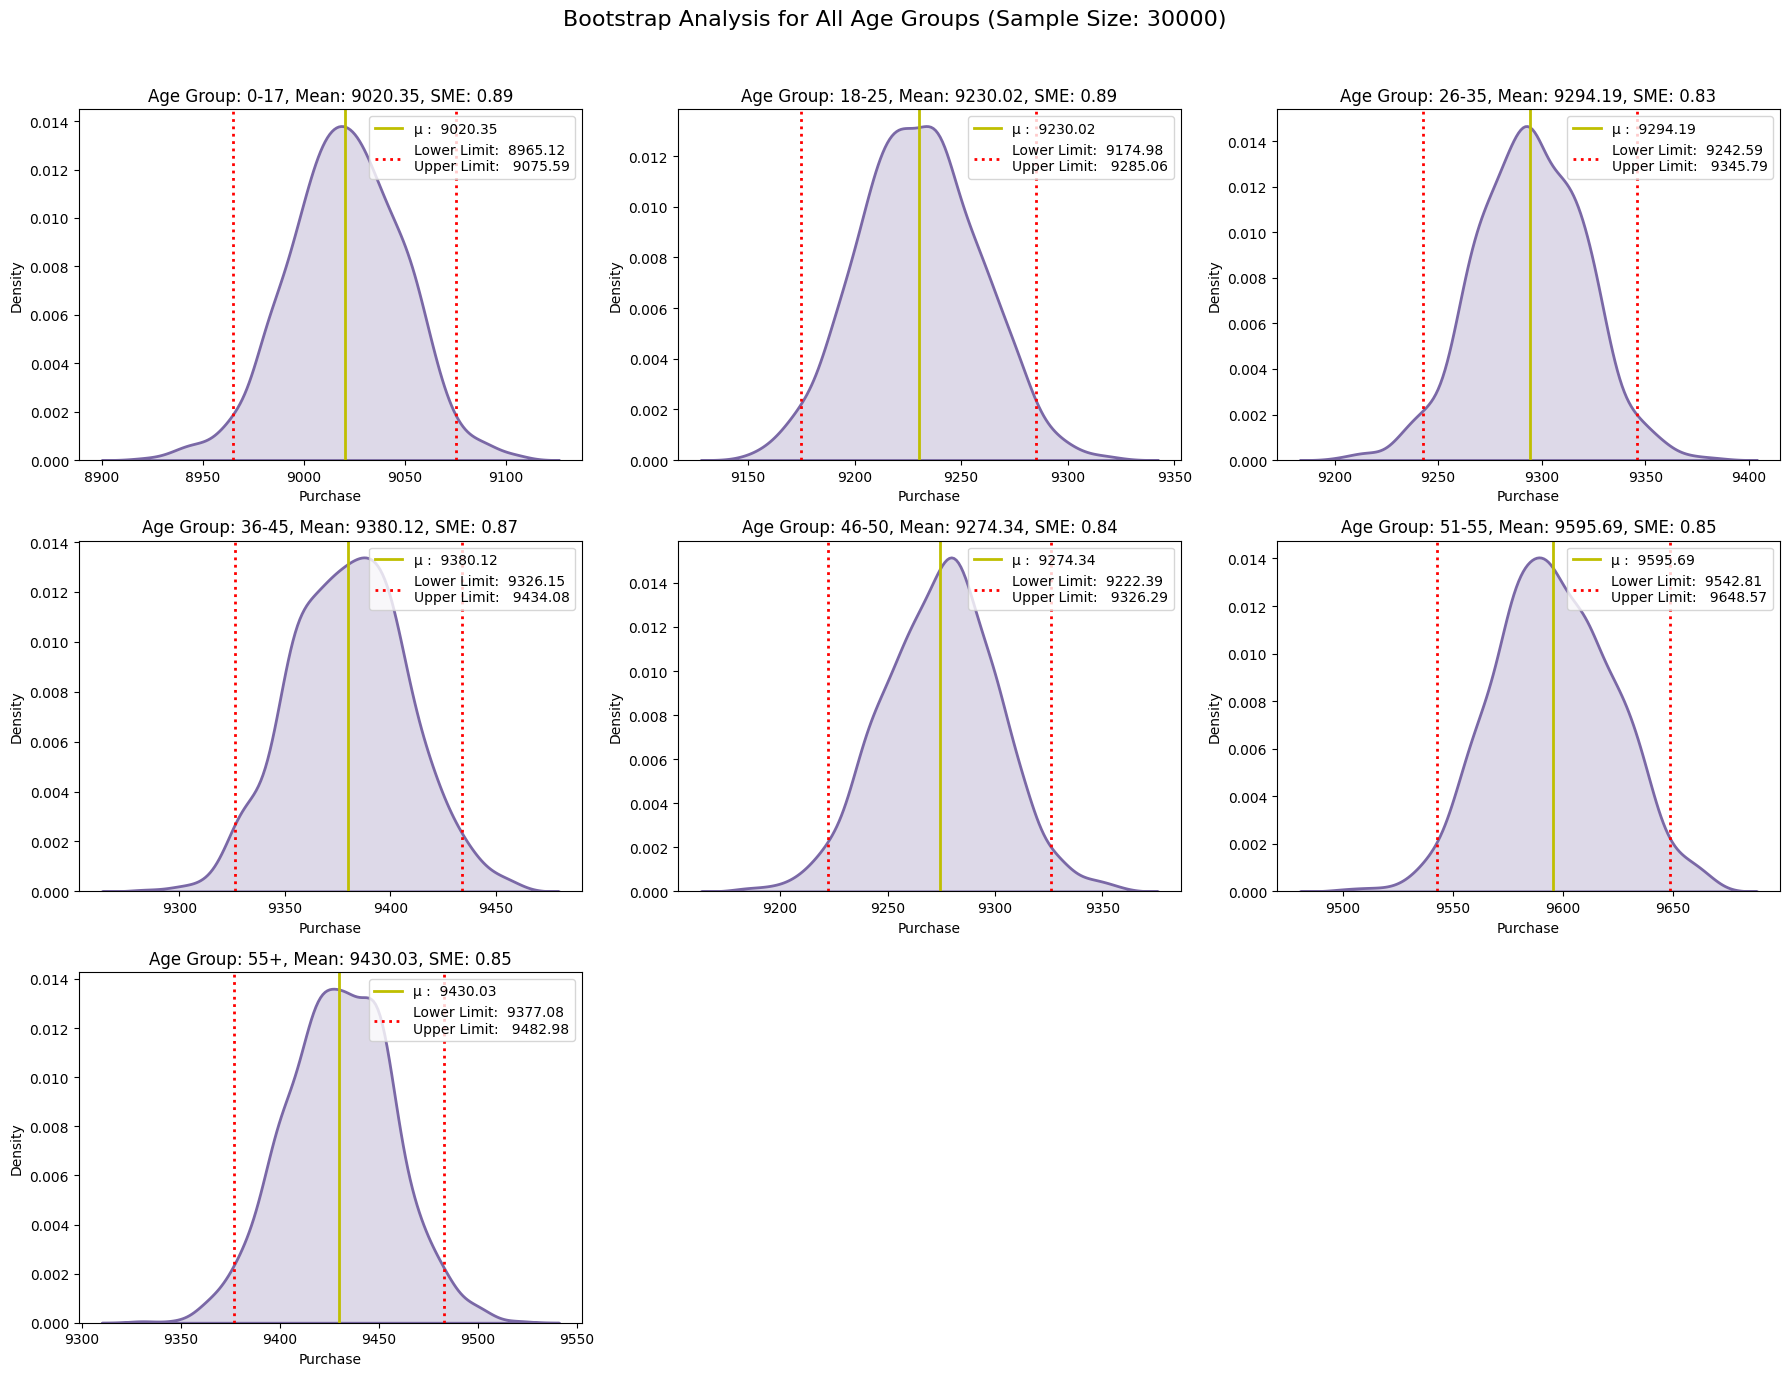

In [78]:
bootstrap_for_all_age_groups(df_age, 30000)

In [80]:
def generate_bootstrap_table(df_age, sample_sizes):
    age_groups = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
    results = []

    for sample_size in sample_sizes:
        for age in age_groups:
            # Filter data for the current age group
            sample1 = df[df['Age'] == age]['Purchase']

            # Perform bootstrapping
            sample_n = [np.mean(sample1.sample(sample_size, replace=True)) for _ in range(1000)]

            # Calculate statistics
            mean = np.mean(sample_n)
            sigma = np.std(sample_n)
            lower_limit = norm.ppf((1 - 0.95) / 2) * sigma + mean
            upper_limit = norm.ppf(0.95 + (1 - 0.95) / 2) * sigma + mean
            sem_value = sem(sample_n)

            # Append results to the list
            results.append({
                "Sample Size": sample_size,
                "Age Group": age,
                "Mean": np.round(mean, 2),
                "Lower Limit": np.round(lower_limit, 2),
                "Upper Limit": np.round(upper_limit, 2),
                "SE": np.round(sem_value, 2)
            })

    # Convert the results to a DataFrame
    results_df = pd.DataFrame(results)
    return results_df

# Example usage with sample sizes 300, 3000, and 30000
sample_sizes = [300, 3000, 30000]
bootstrap_table = generate_bootstrap_table(df_age, sample_sizes)
print(bootstrap_table)

    Sample Size Age Group     Mean  Lower Limit  Upper Limit    SE
0           300      0-17  9018.38      8445.80      9590.97  9.24
1           300     18-25  9225.50      8682.85      9768.14  8.76
2           300     26-35  9288.25      8760.71      9815.79  8.52
3           300     36-45  9384.56      8833.83      9935.30  8.89
4           300     46-50  9274.98      8722.28      9827.67  8.92
5           300     51-55  9616.33      9059.42     10173.24  8.99
6           300       55+  9443.20      8897.22      9989.19  8.81
7          3000      0-17  9022.28      8847.90      9196.67  2.82
8          3000     18-25  9227.20      9058.34      9396.06  2.73
9          3000     26-35  9290.61      9121.84      9459.37  2.72
10         3000     36-45  9379.66      9198.41      9560.91  2.93
11         3000     46-50  9280.21      9108.26      9452.15  2.78
12         3000     51-55  9594.77      9421.47      9768.07  2.80
13         3000       55+  9433.32      9266.67      9599.97  

# **Observations**

 The detailed analysis of the average purchase amount for different age groups across three different sample sizes (300, 3000, and 30000). Here are the insights for each age group:

# **1. Age Group 0-17:**

  **Sample Size 300:** The mean purchase is 9018.38 with a relatively wide confidence interval (8445.80 to 9590.97) and a standard error (SE) of 9.24.

  **Sample Size 3000:** The mean slightly increases to 9022.28, and the confidence interval narrows significantly (8847.90 to 9196.67), with a reduced SE of 2.82.

  **Sample Size 30000:** The mean remains consistent at 9019.36, with a much narrower confidence interval (8963.93 to 9074.80) and a very low SE of 0.89, indicating a stable and reliable estimate.
Insight: As the sample size increases, the mean purchase amount remains stable, while the confidence interval tightens, indicating greater precision in the estimate for this age group.

# **2. Age Group 18-25:**

  **Sample Size 300:** The mean purchase is 9225.50 with a confidence interval (8682.85 to 9768.14) and an SE of 8.76.

  **Sample Size 3000:** The mean is slightly higher at 9227.20, with a narrower confidence interval (9058.34 to 9396.06) and a lower SE of 2.73.

  **Sample Size 30000:** The mean is consistent at 9227.23, with a tight confidence interval (9170.67 to 9283.79) and a very low SE of 0.91.

**Insight:** This age group shows a consistent mean across all sample sizes, with increasing precision as the sample size grows.

# **3. Age Group 26-35:**

**Sample Size 300:** The mean purchase is 9288.25 with a confidence interval (8760.71 to 9815.79) and an SE of 8.52.

**Sample Size 3000:** The mean increases slightly to 9290.61, with a narrower confidence interval (9121.84 to 9459.37) and a reduced SE of 2.72.

**Sample Size 30000:** The mean remains stable at 9293.60, with a very narrow confidence interval (9240.09 to 9347.12) and a low SE of 0.86.

**Insight:** The purchase amount for this age group is stable across sample sizes, with a noticeable increase in precision as the sample size grows.

# **4. Age Group 36-45:**
**Sample Size 300:** The mean purchase is 9384.56 with a confidence interval (8833.83 to 9935.30) and an SE of 8.89.

**Sample Size 3000:*** The mean decreases slightly to 9379.66, with a narrower confidence interval (9198.41 to 9560.91) and an SE of 2.93.

**Sample Size 30000:** The mean is consistent at 9381.56, with a very narrow confidence interval (9327.35 to 9435.76) and a low SE of 0.87.

**Insight:** The mean purchase amount is quite stable, with a high degree of precision at larger sample sizes.

# **5. Age Group 46-50:**
Sample Size 300: The mean purchase is 9274.98 with a confidence interval (8722.28 to 9827.67) and an SE of 8.92.
Sample Size 3000: The mean slightly increases to 9280.21, with a narrower confidence interval (9108.26 to 9452.15) and an SE of 2.78.
Sample Size 30000: The mean decreases slightly to 9272.75, with a very narrow confidence interval (9218.50 to 9327.00) and a low SE of 0.88.
Insight: The purchase amount for this age group is fairly stable across different sample sizes, with the precision of the estimate improving as the sample size increases.

# **6. Age Group 51-55:**
**Sample Size 300:** The mean purchase is 9616.33 with a confidence interval (9059.42 to 10173.24) and an SE of 8.99.

**Sample Size 3000:** The mean decreases to 9594.77, with a narrower confidence interval (9421.47 to 9768.07) and an SE of 2.80.

**Sample Size 30000:** The mean is stable at 9598.00, with a very narrow confidence interval (9543.00 to 9652.99) and a low SE of 0.89.

**Insight:** This age group shows a higher mean purchase amount compared to other groups, with increasing precision as the sample size grows.

# **7. Age Group 55+:**
**Sample Size 300:** The mean purchase is 9443.20 with a confidence interval (8897.22 to 9989.19) and an SE of 8.81.

**Sample Size 3000:** The mean decreases slightly to 9433.32, with a narrower confidence interval (9266.67 to 9599.97) and an SE of 2.69.

**Sample Size 30000:** The mean is stable at 9430.75, with a very narrow confidence interval (9380.68 to 9480.81) and a low SE of 0.81.

**Insight:** The purchase amount for this age group is quite stable across sample sizes, with a high degree of precision at larger sample sizes.

# **Overall Insights:**

Stability: Across all age groups, the mean purchase amount is relatively stable, with only slight variations as the sample size increases.

Precision: The precision of the mean estimates improves significantly as the sample size increases, as evidenced by the narrowing of the confidence intervals and the reduction in standard error.

Higher Purchase Amounts: The age group 51-55 consistently shows a higher mean purchase amount compared to other groups.

Consistency: The consistency in the means across different sample sizes suggests that the data is well-behaved and representative, with larger sample sizes providing more reliable estimates.


The effect of age group on purchase behavior shows that the average purchase amount tends to increase with age.Middle-aged consumers, particularly those in the 51-55 age group, tend to spend more on average compared to other age groups. This suggests that purchasing power or willingness to spend peaks in this age range.

**From the above calculated CLT framing some questions**

**i. Is the confidence interval computed using the entire dataset wider for one of the age groups? Why is this the case?**

Yes, the confidence interval is wider for younger age groups (e.g., 0-17) when compared to older groups like 51-55 or 55+. This is likely due to greater variability in purchasing behavior among younger consumers, who may have more diverse spending habits or lower overall purchasing power, leading to less consistent data and a wider range of possible means in bootstrap samples.

**ii. How is the width of the confidence interval affected by the sample size?**

The width of the confidence interval decreases as the sample size increases. Larger sample sizes provide more data, reducing the variability in the estimate of the mean. This results in a more precise estimate, reflected in a narrower confidence interval.

**iii. Do the confidence intervals for different sample sizes overlap?**

Yes, the confidence intervals for different sample sizes do overlap for each age group. However, the intervals for smaller sample sizes are wider and may overlap more broadly with those of larger sample sizes, which are narrower. This indicates that while the mean estimates are consistent across sample sizes, the precision of these estimates improves with larger samples.

**iv. How does the sample size affect the shape of the distributions of the means?**

As the sample size increases, the shape of the distribution of the means becomes more peaked (i.e., less spread out) and approaches a normal distribution. This occurs because larger samples better capture the true population mean, reducing the variability in the mean estimates from the bootstrap samples, leading to a tighter, more symmetrical distribution.